Data: The dataset has future merchant transaction activity, for merchants that start over a 2 year period (2033-2034). The data spans from 1/1/33 through 12/31/34. Although the data is made up, you can consider this to be a random sample of future merchants using Stripe. Each observation is a transaction amount in cents. If the merchant stops processing with Stripe, then they would no longer appear.  

 

Questions:

* We have limited data on these merchants and their transactions, but we are still interested in understanding their payments activity to try to infer the types of merchants using Stripe. Using only the given data, how would you identify different kinds of businesses in the sample? Please generate assignments for each merchant.
* Sometimes a merchant may stop processing with Stripe, which we call churn. We are interested in identifying and predicting churn. Please a) come up with a concrete definition for churn b) identify merchants that have already churned in the dataset, and c) build a model to predict which active merchants are most likely to churn in the near future.

Dataset here.
 

We’re interested in how you solve business problems and your technical skills. Please include how we can apply this work and how that guides your analysis choices.

 

We're interested in your creativity with the data as well as how you communicate the results/insights. Please submit a write-up of your results in a format that can be presented to business teams (document or slides) as well as your code (Python or R). If you continue to the onsite interview, we will ask you to present your findings from your written project. Please don’t spend more than 4-6 hours on the project.

 

Please don't include your name in either the filename or body of your submission. If you'd like to include an HTML file as part of your submission, please upload it as part of a zip file. Finally, please provide an estimate of how much time you spent on the project.

 

 


Please submit here:
https://app.greenhouse.io/tests/c0c3c28498baf461430bf352faeb83ce?utm_medium=email&utm_source=TakeHomeTest

In [1]:
import numpy as np
import pandas as pd

### EDA

#### read data

In [2]:
df = pd.read_csv('takehome_ds_written.csv', index_col=0)

C:\Users\xiaoyal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [4]:
df.shape

(1513719, 3)

In [5]:
df.isna().any()

merchant               False
time                   False
amount_usd_in_cents    False
dtype: bool

In [6]:
df.time = df.time.apply(lambda x:pd.Timestamp(x))

In [7]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [8]:
len(df.merchant.unique())

14351

## Q1: Clustering
### use feature engineering to work with sales data for clustering purpose
Thoughts:
* sales feature(mean, variance)
* sales happens when(sales per day/week/month, time of the day morning, noon, night; start date on strip)
* model wise, can use kmeans or EM, elbow to decide number of clusters
* try deep learning for clustering? see if data is large enough
* booming business more likely to stay, try daily sales improvement? trend?

# aggregate merchants

In [9]:
num_trans = df.groupby('merchant')['time'].count().sort_values(ascending=False).to_frame('counts')


### if transaction history too few, ignore them? why they not use anymore?
### any chance that they change names afterwards?

In [10]:
num_trans

,counts
merchant,
5608f200cf,25512
53b3fbeae2,12178
1ddaea9838,12042
89e2d29885,11969
654930c922,11222
...,...
9847b12953,1
985bf67891,1
9865dca5a3,1


In [11]:
num_trans[num_trans.counts.isin([2])]

,counts
merchant,
0da551e393,2
371ff5ac71,2
375115715e,2
0276515bcb,2
0cfe60ebd0,2
...,...
8bb15df846,2
33222c262e,2
cd519ec699,2


#### power users take about 80% volume

In [12]:
num_trans[:int(len(num_trans)*0.10)].sum()/num_trans.sum()

counts    0.799639
dtype: float64

In [13]:
num_trans[num_trans.counts==1].shape#[-10:]

(1666, 1)

In [14]:
num_trans.shape

(14351, 1)

In [15]:
df[df.merchant.isin(['36fe55a483'])]

,merchant,time,amount_usd_in_cents
193410,36fe55a483,2033-12-23 19:05:00,163053
1200319,36fe55a483,2034-09-08 00:16:22,422585


In [16]:
df.set_index('merchant').loc[num_trans[num_trans.counts>=2][-10:].index]

,time,amount_usd_in_cents
merchant,,
5d70ad2a02,2033-12-01 00:54:14,108991
5d70ad2a02,2034-02-25 22:26:49,6570
5a92017ae0,2034-07-28 12:09:59,23973
5a92017ae0,2034-07-22 17:28:58,23356
33b9fa9763,2033-01-02 01:07:20,12756
33b9fa9763,2033-01-02 00:56:44,4460
cd5e78c75a,2034-06-03 03:29:26,656
cd5e78c75a,2034-05-26 10:14:52,614
b2cda87c4d,2034-02-24 23:39:56,646575


In [17]:
num_trans.describe()

,counts
count,14351.000000
mean,105.478294
std,527.717966
min,1.000000
25%,3.000000
50%,11.000000
75%,45.000000
max,25512.000000


#### get total counts of sales, first day on stripe, last day on stripe

In [18]:
def get_agg_merchants(df):
    start =  df.groupby('merchant')['time'].min().to_frame('start time')
    end = df.groupby('merchant')['time'].max().to_frame('end time')
    counts = df.groupby('merchant')['time'].count().to_frame('counts')#.sort_values(ascending=False).to_frame('counts')
    results = start.join(end).join(counts)
    return results.sort_values('counts',ascending=False)

In [19]:
agg_mer = get_agg_merchants(df)

In [20]:
agg_mer.head()

,start time,end time,counts
merchant,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222


In [21]:
agg_mer.counts.plot.hist()

#### sales amount from the largest merchant in terms of sales

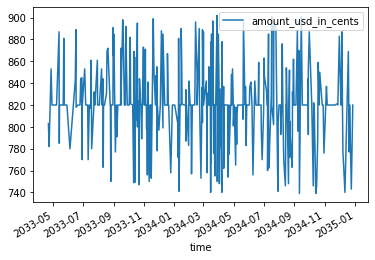

In [22]:
larget_mer = df.set_index('merchant').loc['5608f200cf']
larget_mer.sort_values('time')
larget_mer.set_index('time')
larget_mer[-400:].plot('time','amount_usd_in_cents')

In [23]:
larget_mer.amount_usd_in_cents.describe()

count    25512.000000
mean       819.675878
std         33.842892
min        382.000000
25%        820.000000
50%        820.000000
75%        820.000000
max        902.000000
Name: amount_usd_in_cents, dtype: float64

In [24]:

larget_mer.amount_usd_in_cents.unique()

array([789, 797, 820, 861, 841, 743, 901, 896, 819, 827, 890, 796, 804,
       897, 830, 787, 813, 748, 766, 784, 843, 757, 878, 806, 872, 798,
       869, 756, 885, 838, 888, 805, 891, 774, 785, 760, 777, 755, 821,
       808, 771, 833, 825, 876, 791, 862, 794, 783, 842, 779, 837, 793,
       746, 810, 800, 824, 868, 807, 851, 781, 758, 870, 879, 847, 894,
       759, 875, 767, 877, 892, 881, 790, 742, 778, 889, 761, 764, 765,
       740, 887, 849, 768, 898, 899, 751, 776, 902, 871, 782, 763, 762,
       893, 858, 754, 853, 859, 828, 812, 839, 850, 816, 802, 738, 852,
       882, 840, 739, 818, 817, 826, 880, 823, 836, 775, 855, 773, 741,
       860, 863, 753, 745, 815, 780, 747, 854, 750, 770, 792, 846, 865,
       744, 856, 811, 795, 844, 809, 831, 845, 832, 801, 867, 829, 857,
       834, 822, 873, 786, 866, 886, 883, 769, 864, 788, 752, 749, 848,
       884, 900, 803, 835, 895, 814, 772, 799, 874, 438, 434, 423, 444,
       382], dtype=int64)

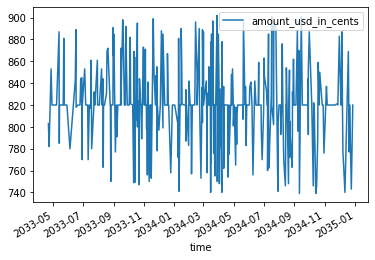

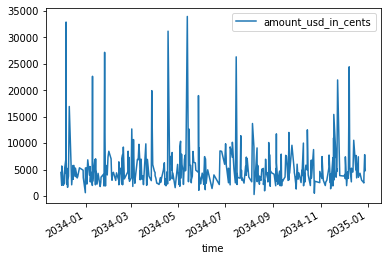

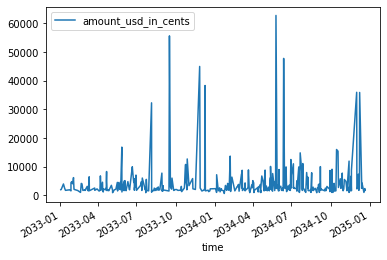

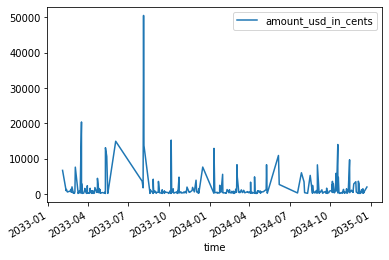

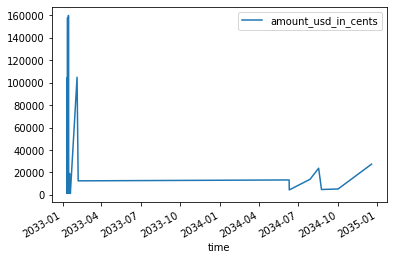

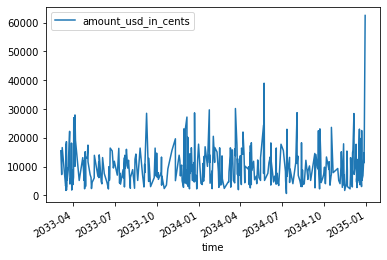

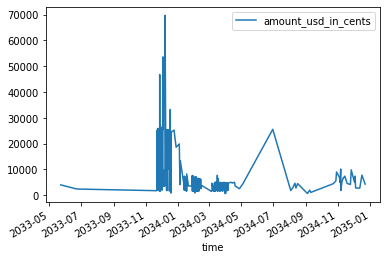

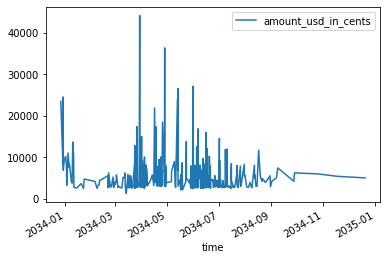

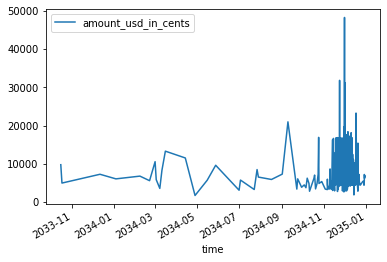

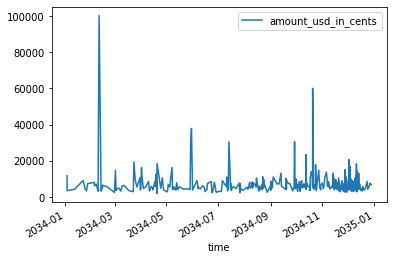

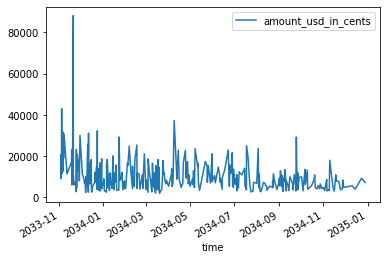

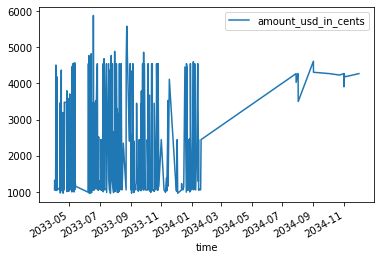

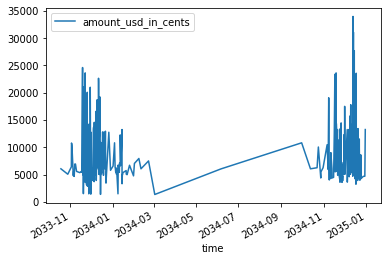

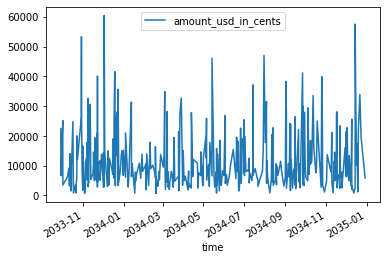

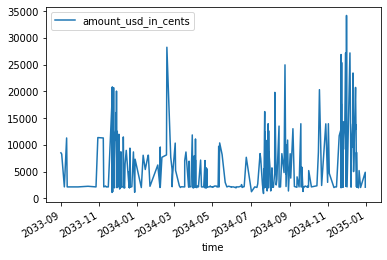

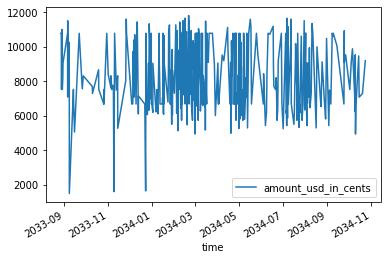

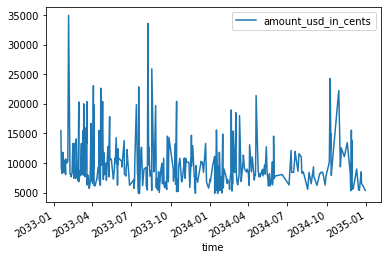

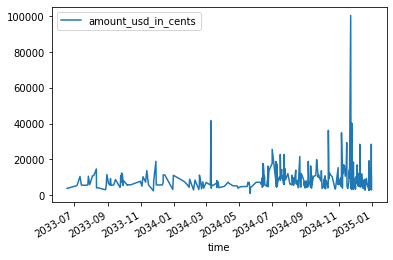

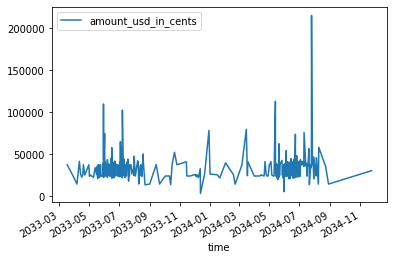

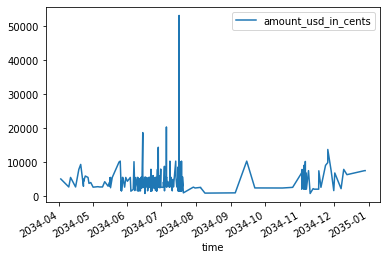

In [25]:

for ix in num_trans[:20].index:
    larger = df.set_index('merchant').loc[ix]
    larger.sort_values(['time'])
    larger.set_index('time')

    larger[-400:].plot('time','amount_usd_in_cents')

In [26]:
larger.head()

,time,amount_usd_in_cents
merchant,,
681836a496,2034-11-02 13:32:21,9012
681836a496,2034-06-21 19:07:36,5403
681836a496,2034-06-21 01:32:51,2409
681836a496,2034-06-20 13:15:16,2574
681836a496,2034-06-20 20:24:20,2221


#### check how many merchants stop business before end of 2034

In [27]:
early_exiter = agg_mer[agg_mer['end time']<pd.Timestamp(2034,12,30)]

In [28]:
early_exiter.head()

,start time,end time,counts
merchant,,,
4ec0b84264,2033-05-11 22:08:32,2034-12-24 02:35:17,10213
7ebe98c24a,2033-12-15 21:20:36,2034-12-20 21:02:39,10208
36745cc693,2033-03-27 16:16:46,2034-12-16 07:19:43,9578
02c9bf7fcd,2033-08-27 01:41:52,2034-10-27 05:36:29,7108
b8a9e64299,2034-05-11 14:09:14,2034-12-29 18:54:04,6083


In [29]:
early_exiter.shape

(12958, 3)

In [30]:
agg_mer.shape

(14351, 3)

In [31]:
agg_mer['end time'].apply(lambda x:pd.Timestamp.date(x)).describe()

count          14351
unique           714
top       2034-12-30
freq             787
Name: end time, dtype: object

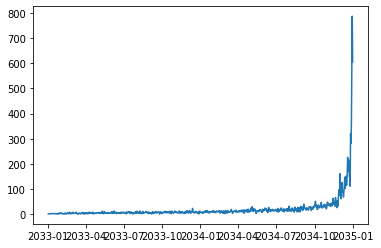

In [32]:
agg_mer['end time'].apply(lambda x:pd.Timestamp.date(x)).value_counts().plot()

In [33]:
merch_by_enddate = agg_mer['end time'].apply(lambda x:pd.Timestamp.date(x)).value_counts()

In [34]:
merch_by_enddate[100:]

2034-11-23    26
2034-08-25    26
2034-10-13    26
2034-10-30    26
2034-09-21    26
              ..
2033-09-25     1
2033-04-05     1
2033-02-14     1
2033-04-21     1
2033-01-25     1
Name: end time, Length: 614, dtype: int64

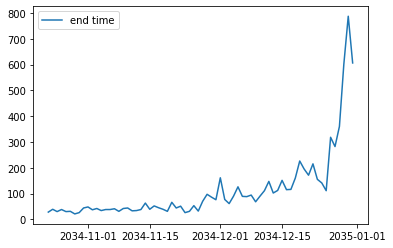

In [35]:
merch_by_enddate.to_frame().sort_index()[-70:].plot()

In [36]:
merch_by_enddate.to_frame().sort_index()[-70:].sum()

end time    7814
dtype: int64

#### time between trades

In [37]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [38]:
df_ordered = df.sort_values('time')
df_ordered['next_tran_time'] = df_ordered.groupby(['merchant'])['time'].shift(-1)
df_ordered['time_diff'] = (df_ordered.next_tran_time-df_ordered.time).apply(lambda x:x.total_seconds())


In [39]:
df_ordered.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
731682,3e72388b82,2033-01-01 09:38:32,4335,2033-01-04 05:52:43,245651.0
157657,32cd721943,2033-01-01 12:53:52,6019,2033-01-01 15:25:09,9077.0
1471395,a8ff2d667e,2033-01-01 15:08:55,3942,2033-01-01 15:34:17,1522.0
1297306,cad5cd6286,2033-01-01 15:16:32,1926,2033-01-05 16:26:50,349818.0
1409868,878047f4b9,2033-01-01 15:19:16,4839,2033-01-01 20:24:49,18333.0


In [40]:
df_ordered.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
731682,3e72388b82,2033-01-01 09:38:32,4335,2033-01-04 05:52:43,245651.0
157657,32cd721943,2033-01-01 12:53:52,6019,2033-01-01 15:25:09,9077.0
1471395,a8ff2d667e,2033-01-01 15:08:55,3942,2033-01-01 15:34:17,1522.0
1297306,cad5cd6286,2033-01-01 15:16:32,1926,2033-01-05 16:26:50,349818.0
1409868,878047f4b9,2033-01-01 15:19:16,4839,2033-01-01 20:24:49,18333.0


In [41]:
df_ordered.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
731682,3e72388b82,2033-01-01 09:38:32,4335,2033-01-04 05:52:43,245651.0
157657,32cd721943,2033-01-01 12:53:52,6019,2033-01-01 15:25:09,9077.0
1471395,a8ff2d667e,2033-01-01 15:08:55,3942,2033-01-01 15:34:17,1522.0
1297306,cad5cd6286,2033-01-01 15:16:32,1926,2033-01-05 16:26:50,349818.0
1409868,878047f4b9,2033-01-01 15:19:16,4839,2033-01-01 20:24:49,18333.0


In [42]:
df_ordered.set_index('merchant').loc['faa029c6b0']

,time,amount_usd_in_cents,next_tran_time,time_diff
merchant,,,,
faa029c6b0,2033-08-07 21:47:12,31870,2033-08-10 11:44:44,223052.0
faa029c6b0,2033-08-10 11:44:44,32683,2033-08-12 03:31:26,143202.0
faa029c6b0,2033-08-12 03:31:26,30860,2033-08-18 17:28:42,568636.0
faa029c6b0,2033-08-18 17:28:42,34812,2033-08-25 23:32:52,626650.0
faa029c6b0,2033-08-25 23:32:52,15992,2033-08-30 10:26:44,384832.0
...,...,...,...,...
faa029c6b0,2034-12-28 21:56:55,15768,2034-12-29 00:36:28,9573.0
faa029c6b0,2034-12-29 00:36:28,14118,2034-12-29 01:46:10,4182.0
faa029c6b0,2034-12-29 01:46:10,41285,2034-12-29 21:20:43,70473.0


In [43]:
df.set_index('merchant').loc['faa029c6b0'].shape

(544, 2)

In [44]:
exp_dis = df_ordered.set_index('merchant').loc['faa029c6b0'].time_diff#.apply(lambda x:x.total_seconds())

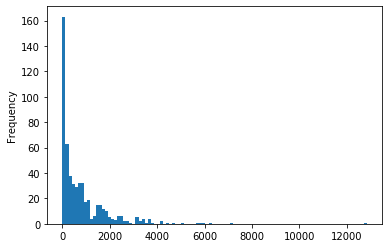

In [45]:
(exp_dis/100).plot.hist(bins=100)

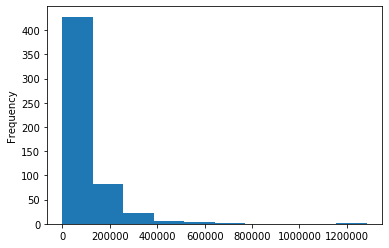

In [46]:
(exp_dis).plot.hist(bins=10)

In [47]:
sorted(exp_dis,reverse=False)[int(len(exp_dis)*0.9)]#/exp_dis[:-1].sum()

198072.0

In [48]:
len(exp_dis)

544

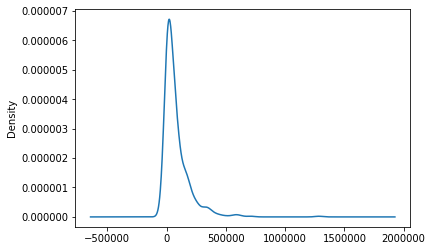

In [49]:
exp_dis[:-1].plot.density()

In [50]:
df_ordered.set_index('merchant').loc['faa029c6b0'].head()

,time,amount_usd_in_cents,next_tran_time,time_diff
merchant,,,,
faa029c6b0,2033-08-07 21:47:12,31870,2033-08-10 11:44:44,223052.0
faa029c6b0,2033-08-10 11:44:44,32683,2033-08-12 03:31:26,143202.0
faa029c6b0,2033-08-12 03:31:26,30860,2033-08-18 17:28:42,568636.0
faa029c6b0,2033-08-18 17:28:42,34812,2033-08-25 23:32:52,626650.0
faa029c6b0,2033-08-25 23:32:52,15992,2033-08-30 10:26:44,384832.0


#### update transform functions

In [51]:
def get_agg_merchants(df):
    start =  df.groupby('merchant')['time'].min().to_frame('start_time')
    end = df.groupby('merchant')['time'].max().to_frame('end_time')
    counts = df.groupby('merchant')['time'].count().to_frame('transaction_counts')
    time_diff = df.groupby('merchant')['time_diff'].mean().to_frame('time_btween')
    total_sales = df.groupby('merchant')['amount_usd_in_cents'].sum().to_frame('total_sales')
    sales_per = df.groupby('merchant')['amount_usd_in_cents'].mean().to_frame('sales_pertrans')
    df['hours'] = df.time.apply(lambda x:x.time().hour)
    time_of_day = df.groupby('merchant')['hours'].mean().to_frame('time_of_day')
    #daily_trans = df.apply(lambda x:x.counts/(x.end_time-x.start_time).days)
    results = start.join(end).join(counts).join(time_diff).join(total_sales).join(sales_per).join(time_of_day)
    return results.sort_values('transaction_counts',ascending=False)

In [52]:
    df['hours'] = df.time.apply(lambda x:x.time().hour)


In [53]:
df_ordered.set_index('merchant').loc['0002b63b92']

time                   2033-05-16 20:07:57
amount_usd_in_cents                   3379
next_tran_time                         NaT
time_diff                              NaN
Name: 0002b63b92, dtype: object

In [54]:
time_diff = df_ordered.groupby('merchant')['time_diff'].mean().to_frame('time_btween')

In [55]:
df_ordered.set_index('merchant').loc['69d984dfd1']

,time,amount_usd_in_cents,next_tran_time,time_diff
merchant,,,,
69d984dfd1,2033-09-19 14:02:05,35562,2033-09-22 14:11:25,259760.0
69d984dfd1,2033-09-22 14:11:25,19292,NaT,NaN


##### all the na from calculate time difference are merchants only have 1 transaction records

In [56]:
sum(time_diff.isna().values)

array([1666])

In [57]:
num_trans[num_trans.counts==1].shape

(1666, 1)

In [58]:
time_diff.shape

(14351, 1)

In [59]:
agg_mer = get_agg_merchants(df_ordered)

In [60]:
agg_mer.dropna(inplace=True)
agg_mer.shape[0]-14351 # should be -1666, the merchants with only 1 history


-1666

In [61]:
agg_mer.head()

,start_time,end_time,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day
merchant,,,,,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512,2171.964133,20911571,819.675878,11.001137
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178,2812.583723,60733740,4987.168665,11.427574
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042,5214.221576,41443545,3441.583209,13.976665
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969,5083.599432,18054500,1508.438466,12.356087
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222,5529.964263,151116295,13466.075120,10.683568


In [62]:
agg_mer['total_days'] = (agg_mer.end_time-agg_mer.start_time).apply(lambda x:x.days)#pd.Timedelta.total_seconds)

In [63]:
agg_mer['trans_perday'] = agg_mer.transaction_counts/agg_mer.total_days

In [64]:
agg_mer['sales_perday'] = agg_mer.total_sales/agg_mer.total_days


In [65]:
def feature_eng(agg_mer):
    agg_mer['total_days'] = (agg_mer.end_time-agg_mer.start_time).apply(lambda x:x.days)+1
    agg_mer['trans_perday'] = agg_mer.transaction_counts/agg_mer.total_days
    agg_mer['sales_perday'] = agg_mer.total_sales/agg_mer.total_days
    return agg_mer

In [66]:
agg_mer = get_agg_merchants(df_ordered)
agg_mer = feature_eng(agg_mer)
agg_mer.dropna(inplace=True)

In [67]:
agg_mer[100:110]

,start_time,end_time,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day,total_days,trans_perday,sales_perday
merchant,,,,,,,,,,
e53c9543bc,2033-04-09 15:12:05,2034-12-30 18:11:54,2342,23256.210594,14590378,6229.879590,17.578992,631,3.711569,23122.627575
d503cb6f1c,2033-06-17 16:59:34,2034-12-31 06:43:00,2337,20770.464897,58278766,24937.426615,7.947368,562,4.158363,103698.871886
8ca23d4d9e,2033-11-21 17:02:13,2034-12-31 00:01:35,2333,14978.885935,10748812,4607.291899,14.714102,405,5.760494,26540.276543
ee57011cd9,2033-02-15 21:50:45,2034-12-31 05:56:00,2332,25328.320463,27499801,11792.367496,12.433105,684,3.409357,40204.387427
062de5273b,2033-12-01 17:11:26,2034-12-31 04:13:49,2320,14696.568780,19323701,8329.181466,13.057759,395,5.873418,48920.762025
b0276c5ff2,2033-06-18 21:12:26,2034-12-30 23:58:13,2287,21169.705599,6546314,2862.402274,16.912112,561,4.076649,11669.008913
81512d8413,2033-01-01 16:16:19,2034-12-31 03:02:16,2260,27860.981408,12791115,5659.785398,15.000885,729,3.100137,17546.111111
727f440092,2033-02-17 15:11:03,2034-12-31 02:00:46,2255,26121.287933,18341646,8133.767627,15.719734,682,3.306452,26893.909091
8def055c22,2033-04-16 06:17:21,2034-12-31 07:53:06,2229,24200.783214,28684840,12868.927770,8.252580,625,3.566400,45895.744000


### findings with merchant data
* average 381.04 per transaction
* lots of 1 day 1 transactions
* daily volumn avarage at 274
* average trades in two years 105
* total sales average at 16332
* total days about 200 days

In [68]:
agg_mer.describe()

,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day,total_days,trans_perday,sales_perday
count,12685.000000,1.268500e+04,1.268500e+04,1.268500e+04,12685.000000,12685.000000,12685.000000,1.268500e+04
mean,119.200079,1.867858e+06,1.839484e+06,3.478660e+04,13.384709,226.676784,1.480821,2.266213e+04
std,559.859290,3.555165e+06,6.814004e+06,1.376196e+05,3.778688,202.730634,30.537718,4.073084e+05
min,2.000000,1.580280e+01,4.120000e+02,2.060000e+02,0.000000,1.000000,0.002759,2.661642e+00
25%,5.000000,1.720393e+05,5.225200e+04,5.704527e+03,11.250000,43.000000,0.052117,6.390294e+02
50%,14.000000,6.637375e+05,2.181020e+05,1.050521e+04,13.500000,170.000000,0.147059,2.318867e+03
75%,56.000000,2.010619e+06,1.043361e+06,2.501768e+04,15.769231,381.000000,0.527778,8.123382e+03
max,25512.000000,6.261378e+07,2.369072e+08,8.887465e+06,23.000000,729.000000,3358.000000,4.384030e+07


### finding for trans per day
* more than 10% merchants have exactly 1 trade per day, seems reasonalby to cluster them together
* weekly also here, twice per day, once every other day, 4 days, 1 week


In [69]:
agg_mer.trans_perday.value_counts().reset_index()[:15]#.to_numpy()

,index,trans_perday
0,2.000000,242
1,1.000000,106
2,0.250000,103
3,0.500000,102
4,0.285714,70
5,0.142857,66
6,0.333333,65
7,3.000000,62
8,0.666667,54
9,0.200000,50


In [70]:
1/agg_mer.trans_perday.value_counts().index[:15]#.loc[7]

Float64Index([               0.5,                1.0,                4.0,
                             2.0,                3.5,                7.0,
                             3.0, 0.3333333333333333,                1.5,
                             5.0,                6.0,               14.0,
                             7.5,               10.0,               0.25],
             dtype='float64')

In [71]:
agg_mer.trans_perday.value_counts().loc[30]

4

In [72]:
agg_mer.shape

(12685, 10)

In [73]:
df.head()

,merchant,time,amount_usd_in_cents,hours
1,faa029c6b0,2034-06-17 23:34:14,6349,23
2,ed7a7d91aa,2034-12-27 00:40:38,3854,0
3,5608f200cf,2034-04-30 01:29:42,789,1
4,15b1a0d61e,2034-09-16 01:06:23,4452,1
5,4770051790,2034-07-22 16:21:42,20203,16


In [74]:
df.time.iloc[0].time().hour

23

In [75]:
def get_time_of_day(time):
    #aa = time.apply(lambda x:x.time().hour)
    b = [0,4,8,12,16,20,24]
    l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
    return pd.cut(time, bins=b, labels=l, include_lowest=True)

In [76]:
df.head().time

1   2034-06-17 23:34:14
2   2034-12-27 00:40:38
3   2034-04-30 01:29:42
4   2034-09-16 01:06:23
5   2034-07-22 16:21:42
Name: time, dtype: datetime64[ns]

In [77]:
df.head().time.iloc[0].hour

23

In [78]:
agg_mer['time_of_day'] = get_time_of_day(agg_mer.time_of_day)

In [79]:
agg_mer.head()

,start_time,end_time,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day,total_days,trans_perday,sales_perday
merchant,,,,,,,,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512,2171.964133,20911571,819.675878,Morning,642,39.738318,32572.540498
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178,2812.583723,60733740,4987.168665,Morning,397,30.675063,152981.712846
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042,5214.221576,41443545,3441.583209,Noon,727,16.563961,57006.251719
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969,5083.599432,18054500,1508.438466,Noon,705,16.977305,25609.219858
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222,5529.964263,151116295,13466.075120,Morning,719,15.607789,210175.653686


### model training

In [80]:
train = agg_mer.drop(['start_time','end_time'], axis=1)
train = pd.get_dummies(train)
train.dropna(inplace=True)

In [81]:
train.head()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
merchant,,,,,,,,,,,,,
5608f200cf,25512,2171.964133,20911571,819.675878,642,39.738318,32572.540498,0,0,1,0,0,0
53b3fbeae2,12178,2812.583723,60733740,4987.168665,397,30.675063,152981.712846,0,0,1,0,0,0
1ddaea9838,12042,5214.221576,41443545,3441.583209,727,16.563961,57006.251719,0,0,0,1,0,0
89e2d29885,11969,5083.599432,18054500,1508.438466,705,16.977305,25609.219858,0,0,0,1,0,0
654930c922,11222,5529.964263,151116295,13466.075120,719,15.607789,210175.653686,0,0,1,0,0,0


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train
pd.DataFrame([variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))],index=X.columns)

,0
transaction_counts,1.701138
time_btween,1.098322
total_sales,1.845998
sales_pertrans,1.057135
total_days,1.221244
trans_perday,30.126352
sales_perday,30.331779
time_of_day_Late Night,1.015468
time_of_day_Early Morning,1.055382
time_of_day_Morning,1.350447


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X.drop('trans_perday', axis=1)
pd.DataFrame([variance_inflation_factor(vif_data.values, i)
                          for i in range(len(vif_data.columns))],index=vif_data.columns)

,0
transaction_counts,1.617516
time_btween,1.098317
total_sales,1.708606
sales_pertrans,1.047466
total_days,1.218074
sales_perday,1.022962
time_of_day_Late Night,1.015342
time_of_day_Early Morning,1.055026
time_of_day_Morning,1.350315
time_of_day_Noon,1.892199


In [84]:
import pandas as pd
import numpy as np
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from silhouette import silhouette
import matplotlib.cm as cm
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from scipy.stats import norm, kurtosis



%matplotlib inline


In [85]:
X_stan = StandardScaler().fit_transform(train)


#### EM model train

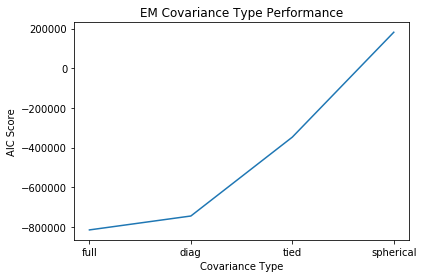

In [86]:

from sklearn.mixture import GaussianMixture

co_type = ['full','diag','tied','spherical']
gm_co_scores = []
aics = []
for t in co_type:
    gm = GaussianMixture(n_components=6, random_state=10,covariance_type=t)
    gm_co = gm.fit_predict(X_stan)
    gm_co_scores.append(silhouette_score(X_stan,gm_co))
    aics.append(gm.aic(X_stan))
plt.title('EM Covariance Type Performance')
plt.xlabel('Covariance Type')
plt.ylabel('AIC Score')
plt.xticks(range(4),co_type)
#plt.plot(gm_co_scores)
plt.plot(aics)

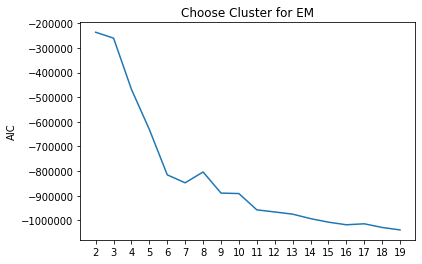

In [87]:
import time

d = X_stan

start = time.time()
ks = [2,4,6,8,10]
ks = range(2,20)
total = []
scores = []
for k in ks:
    #print(k)
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(d)
    total.append(gms.aic(d))
    cluster_labels = gms.fit_predict(d)
    scores.append(silhouette_score(d, cluster_labels))

    #print(time.time()-start)
plt.xticks(range(len(ks)), ks)
plt.title('Choose Cluster for EM')
plt.ylabel('AIC')
plt.plot(total)

### Kmeans

In [88]:
from scipy.spatial.distance import cdist 

def kmeans_elbow(K,X_stan,seed=0):
    distortions = [] 
    inertias = [] 
    silhouette_avg = []
    mapping1 = {} 
    mapping2 = {} 

    for k in K: 
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k,random_state=seed).fit(X_stan) 

        distortions.append(sum(np.min(cdist(X_stan, kmeanModel.cluster_centers_, 
                          'euclidean'),axis=1)) / X_stan.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
        silhouette_avg.append(silhouette_score(X_stan, kmeanModel.predict(X_stan)))

    return silhouette_avg,distortions,inertias

#### both metrics show 10 as the best k

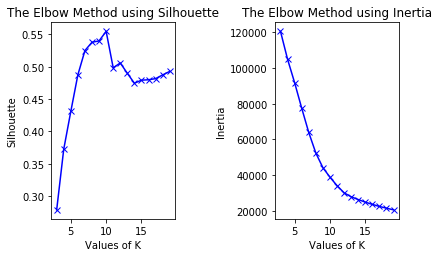

In [89]:
#K = [2,4,6,8,10]
K = [2,5,10,20,30,50,100]

K = range(3,20)

sih,distortions,inertias = kmeans_elbow(K,X_stan,seed = 10)

fig, axs = plt.subplots(1, 2)
#fig.suptitle('Deciding number of clusters', fontsize=16)
axs[0].plot(K, sih, 'bx-')

#plt.plot(K, sih, 'bx-') 
axs[0].set_xlabel('Values of K') 
axs[0].set_ylabel('Silhouette') 
axs[0].title.set_text('The Elbow Method using Silhouette') 

# plt.plot(inertias, 'bx-') 
axs[1].plot(K, inertias, 'bx-')
axs[1].set_xlabel('Values of K') 
axs[1].set_ylabel('Inertia') 
#plt.xticks(range(len(ks)), ks)
axs[1].title.set_text('The Elbow Method using Inertia') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### silhouse visualization

For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 3 The average silhouette_score is : 0.2788131251623888
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 5 The average silhouette_score is : 0.4309128692302579
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871


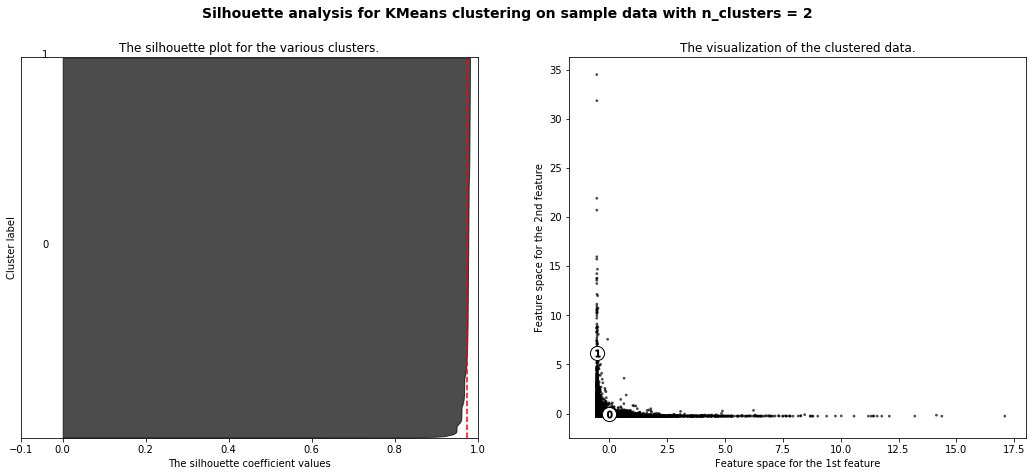

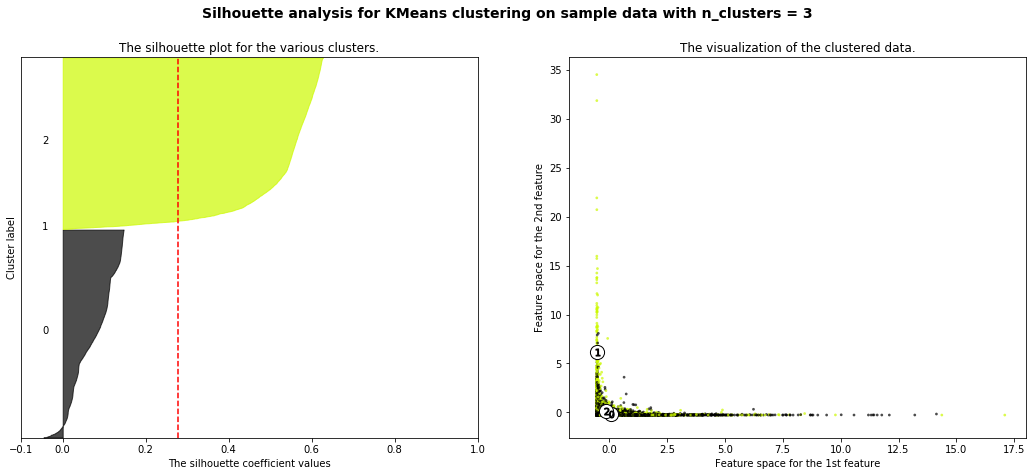

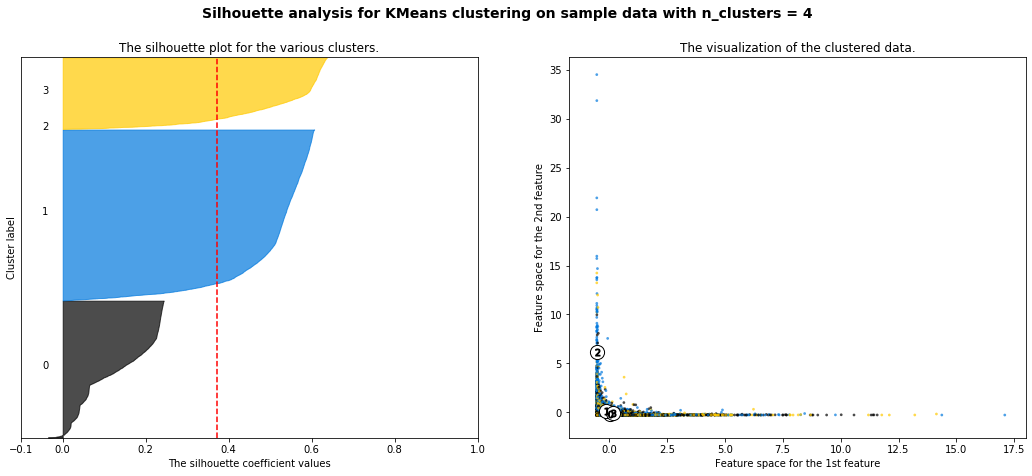

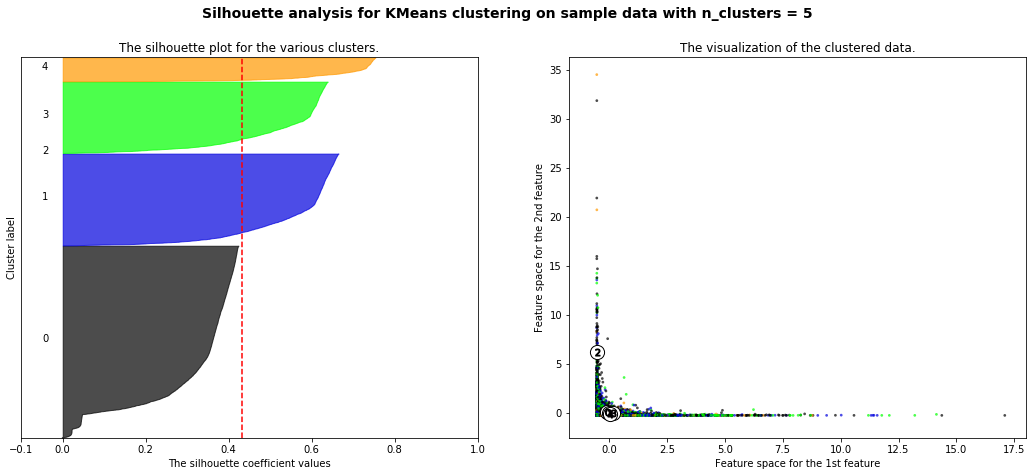

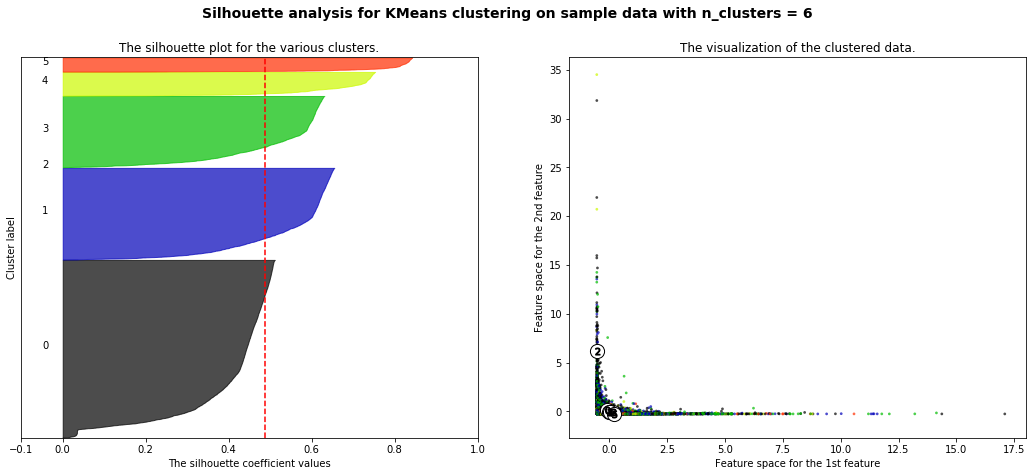

In [90]:
range_n_clusters = [2, 3, 4, 5, 6]
X = X_stan
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[1,2])

For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 3 The average silhouette_score is : 0.2788131251623888
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 5 The average silhouette_score is : 0.4309128692302579
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871


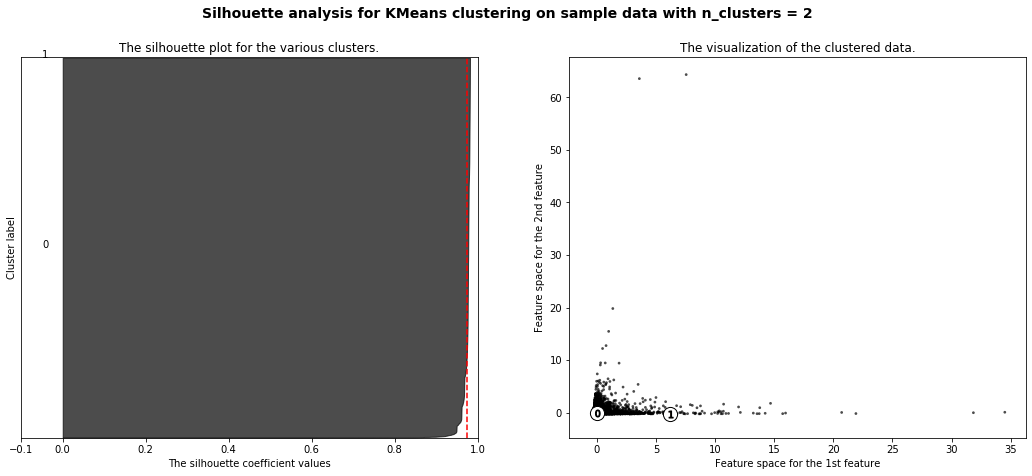

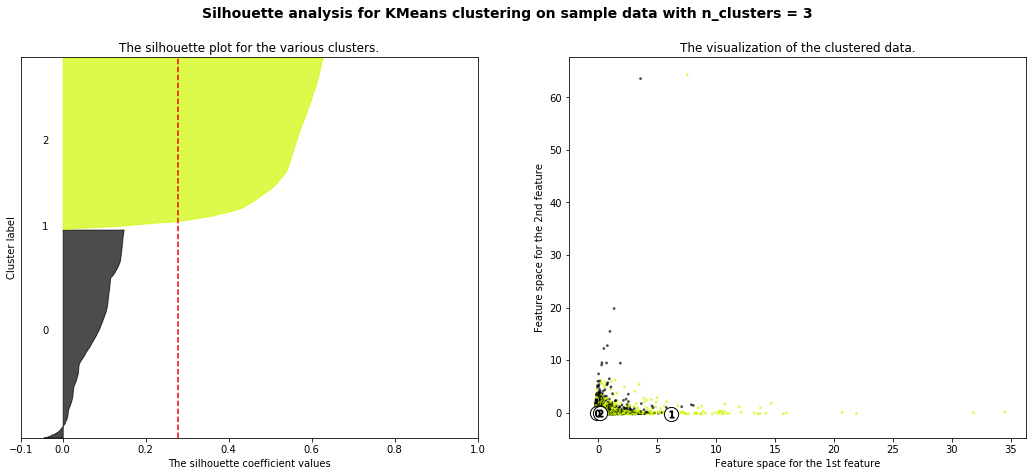

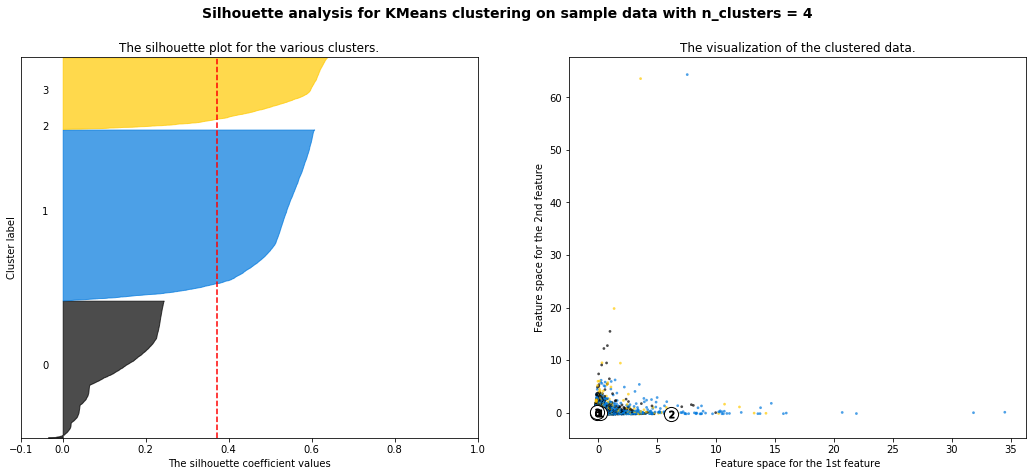

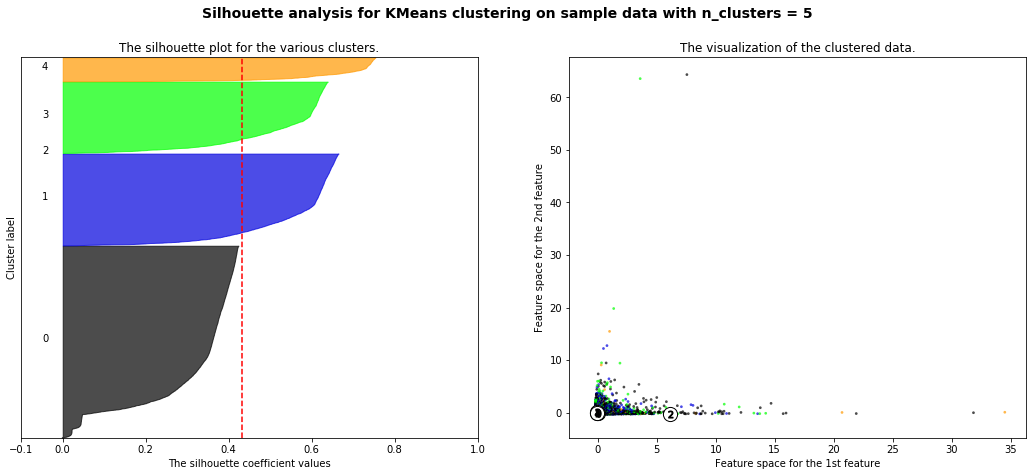

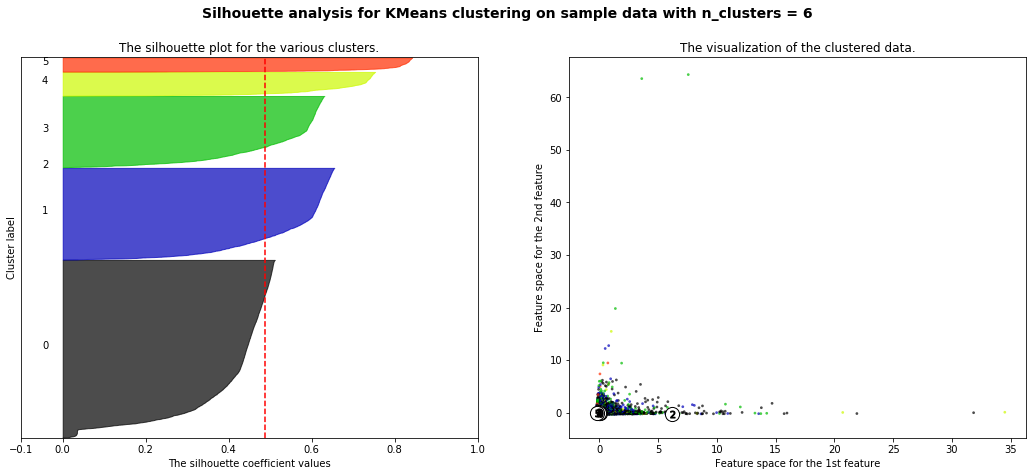

In [91]:
range_n_clusters = [2, 3, 4, 5, 6]
X = X_stan
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[2,3])

For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 8 The average silhouette_score is : 0.5378635087964246
For n_clusters = 10 The average silhouette_score is : 0.5547016030516388
For n_clusters = 14 The average silhouette_score is : 0.4745469136596589


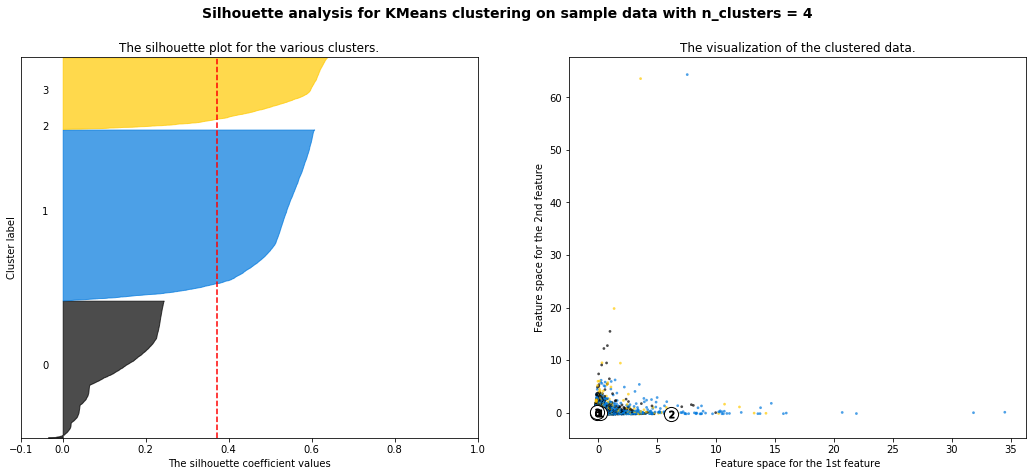

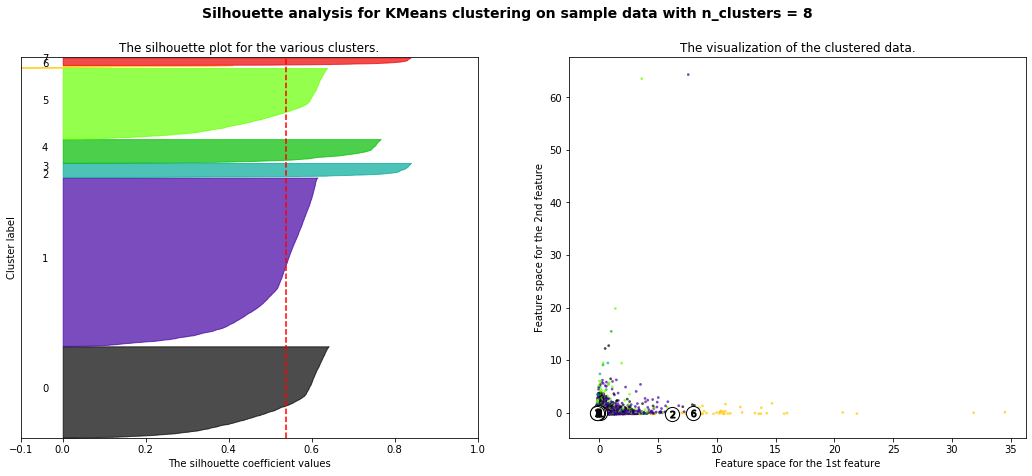

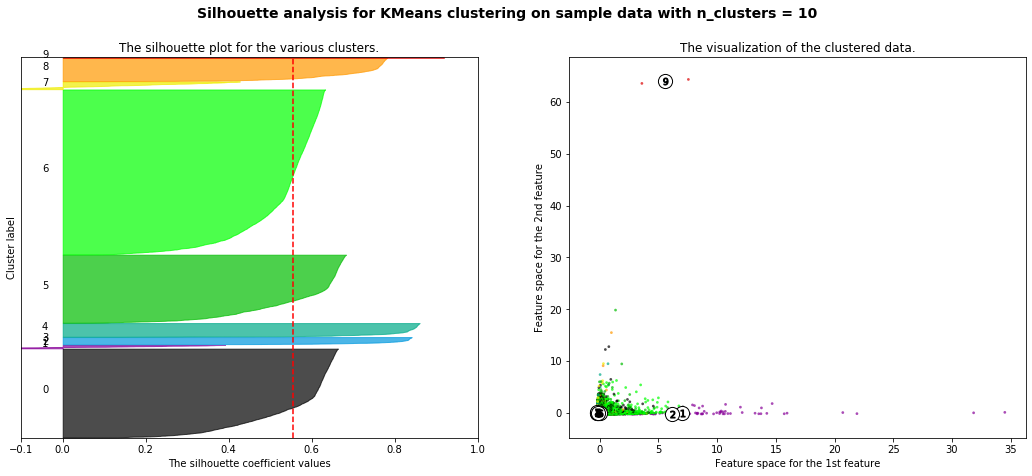

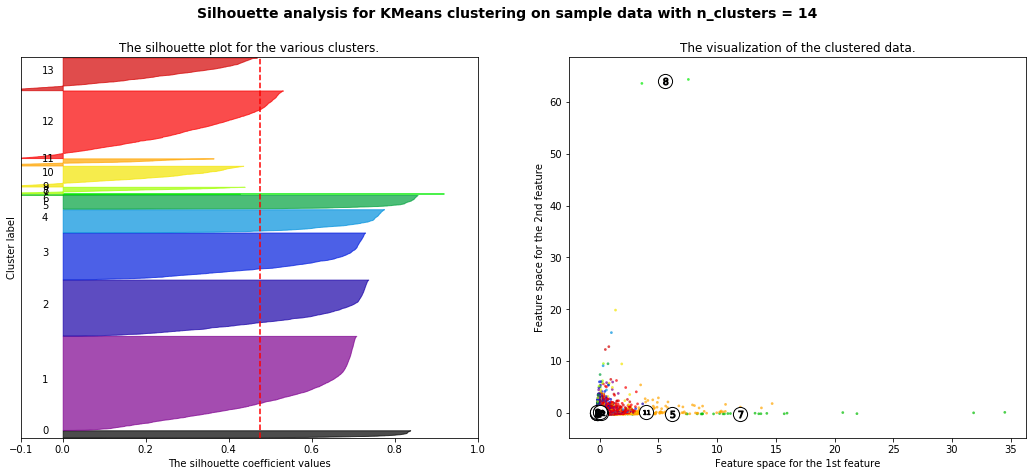

In [92]:
range_n_clusters = [4, 8, 10, 14]
X = X_stan
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[2,3])

For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 3 The average silhouette_score is : 0.2788131251623888
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 5 The average silhouette_score is : 0.4309128692302579
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871


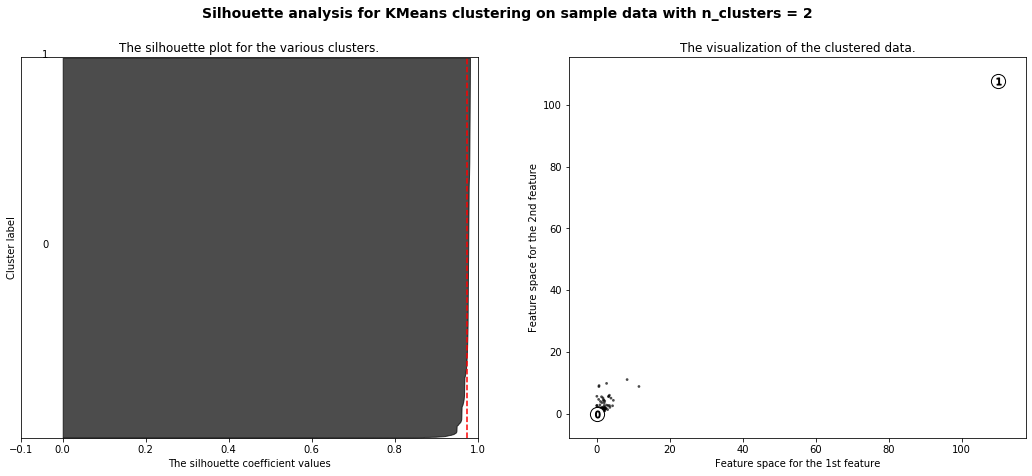

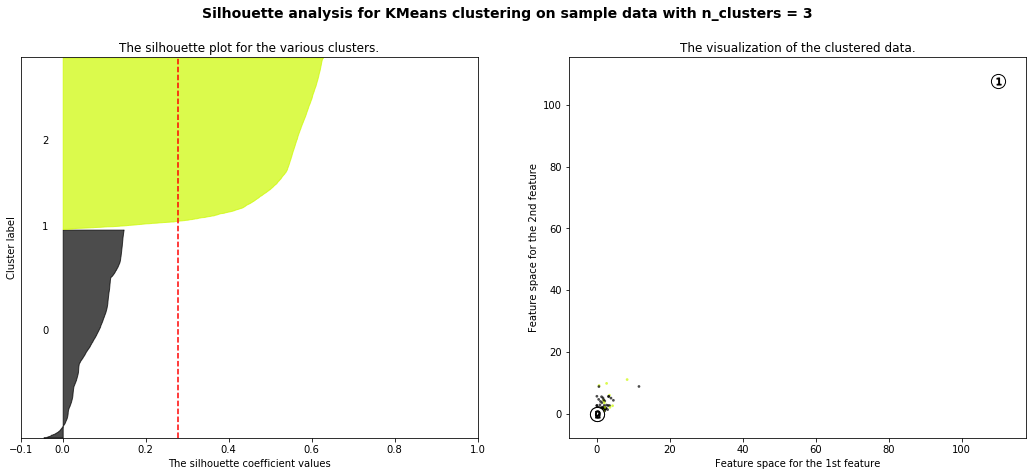

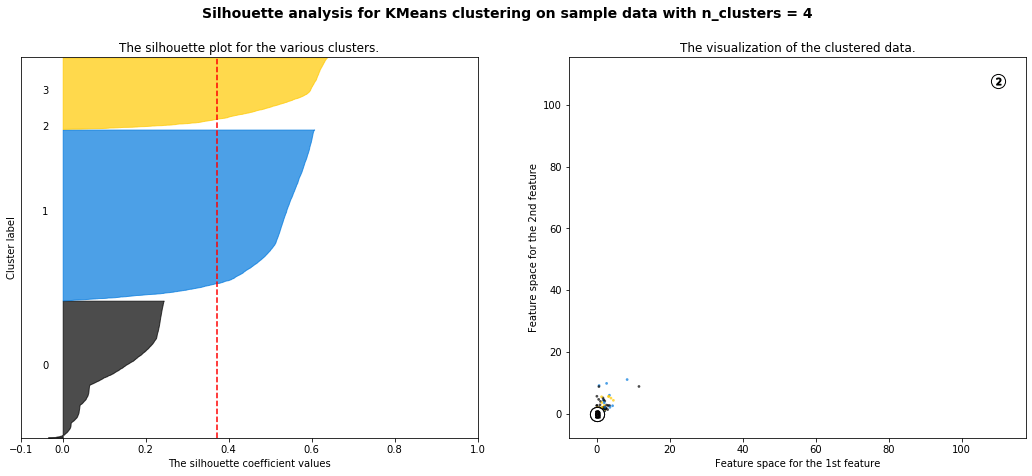

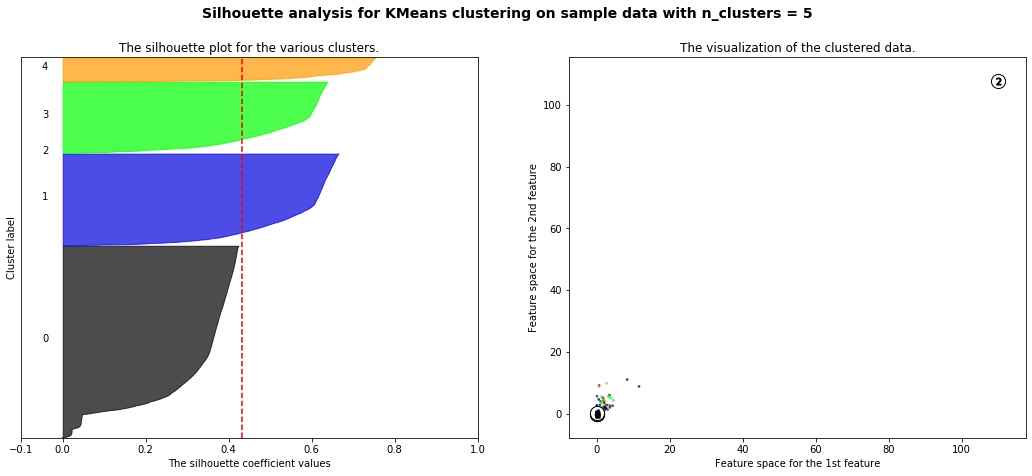

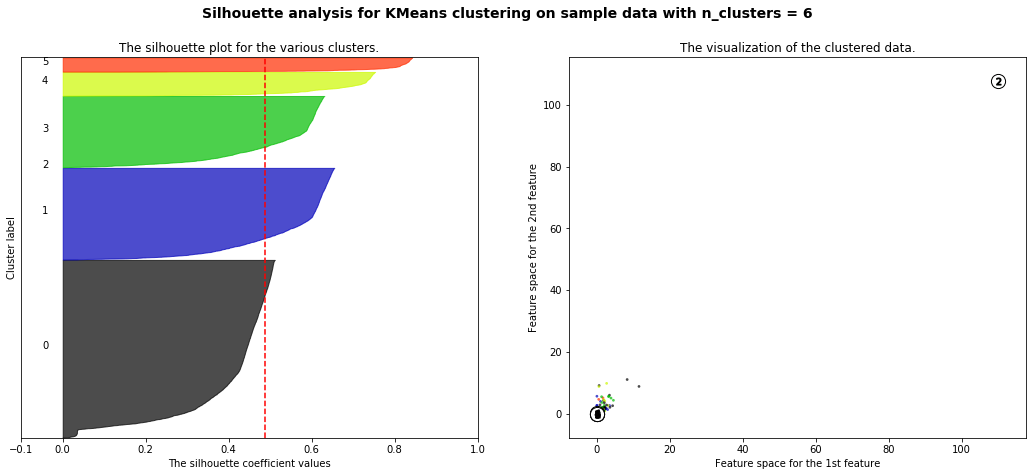

In [93]:
range_n_clusters = [2, 3, 4, 5, 6]
X = X_stan
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[5,6])

In [94]:
train.iloc[:,5:7].describe()

,trans_perday,sales_perday
count,12685.000000,1.268500e+04
mean,1.480821,2.266213e+04
std,30.537718,4.073084e+05
min,0.002759,2.661642e+00
25%,0.052117,6.390294e+02
50%,0.147059,2.318867e+03
75%,0.527778,8.123382e+03
max,3358.000000,4.384030e+07


In [95]:
import numpy as np
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=4)
pca.fit(train)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[7.86976035e-01 2.09954748e-01 2.75792626e-03 3.11286475e-04]
[7.69077762e+08 3.97239430e+08 4.55282362e+07 1.52957095e+07]


In [96]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [97]:
pd.DataFrame(cluster_labels).value_counts()

6    5545
0    2989
5    2289
8     778
4     461
7     262
3     245
1     113
9       2
2       1
dtype: int64

In [98]:
np.where(cluster_labels==2)

(array([59], dtype=int64),)

In [99]:
np.where(cluster_labels==9)

(array([ 9091, 10657], dtype=int64),)

### two minority cluster consists of one merchant have only one day active, but 3358 sale. The other has top two sales per transaction

In [100]:
train.iloc[[59,9091,10657]]

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
merchant,,,,,,,,,,,,,
0b0ea71d37,3358,1.580280e+01,43840305,1.305548e+04,1,3358.000000,4.384030e+07,0,1,0,0,0,0
b993083163,6,1.674654e+06,53324791,8.887465e+06,97,0.061856,5.497401e+05,0,0,0,1,0,0
0838e4078e,3,4.194964e+06,26345953,8.781984e+06,98,0.030612,2.688363e+05,0,0,0,0,1,0


In [101]:
agg_mer.sort_values('sales_pertrans', ascending=False).head()

,start_time,end_time,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day,total_days,trans_perday,sales_perday
merchant,,,,,,,,,,
b993083163,2034-09-21 19:45:34,2034-12-27 17:40:06,6,1.674654e+06,53324791,8.887465e+06,Noon,97,0.061856,549740.113402
0838e4078e,2034-04-29 16:21:18,2034-08-04 18:53:26,3,4.194964e+06,26345953,8.781984e+06,Eve,98,0.030612,268836.255102
26f51e4c7e,2034-06-09 16:04:45,2034-07-20 18:12:43,4,1.183359e+06,11052025,2.763006e+06,Eve,42,0.095238,263143.452381
4e5d7ec3de,2034-06-29 19:34:49,2034-11-21 06:46:23,4,4.160631e+06,8659503,2.164876e+06,Early Morning,145,0.027586,59720.710345
0517835bfd,2034-03-28 16:42:21,2034-10-13 00:44:11,4,5.712037e+06,7168188,1.792047e+06,Morning,199,0.020101,36021.045226


In [102]:
df_ordered.set_index('merchant').loc['0b0ea71d37']

,time,amount_usd_in_cents,next_tran_time,time_diff,hours
merchant,,,,,
0b0ea71d37,2034-08-06 18:06:39,12342,2034-08-06 18:13:00,381.0,18
0b0ea71d37,2034-08-06 18:13:00,11184,2034-08-06 18:18:33,333.0,18
0b0ea71d37,2034-08-06 18:18:33,9106,2034-08-06 18:19:02,29.0,18
0b0ea71d37,2034-08-06 18:19:02,57335,2034-08-06 18:22:31,209.0,18
0b0ea71d37,2034-08-06 18:22:31,22217,2034-08-06 18:26:04,213.0,18
...,...,...,...,...,...
0b0ea71d37,2034-08-07 08:36:42,8486,2034-08-07 08:36:46,4.0,8
0b0ea71d37,2034-08-07 08:36:46,8486,2034-08-07 08:38:34,108.0,8
0b0ea71d37,2034-08-07 08:38:34,9495,2034-08-07 08:42:05,211.0,8


For n_clusters = 4 The average silhouette_score is : 0.44035331530415134
For n_clusters = 8 The average silhouette_score is : 0.554707379514921
For n_clusters = 10 The average silhouette_score is : 0.5058374809651185
For n_clusters = 12 The average silhouette_score is : 0.47464370584834925
For n_clusters = 14 The average silhouette_score is : 0.4763798364269012


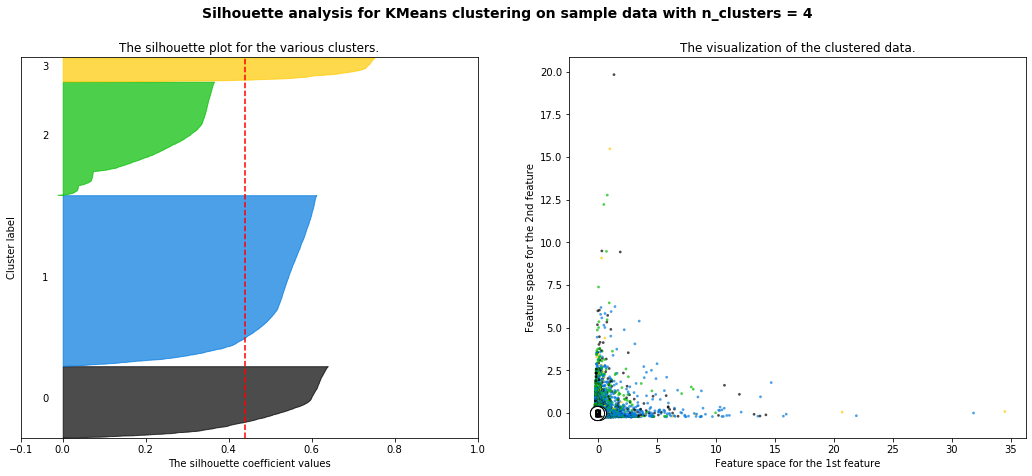

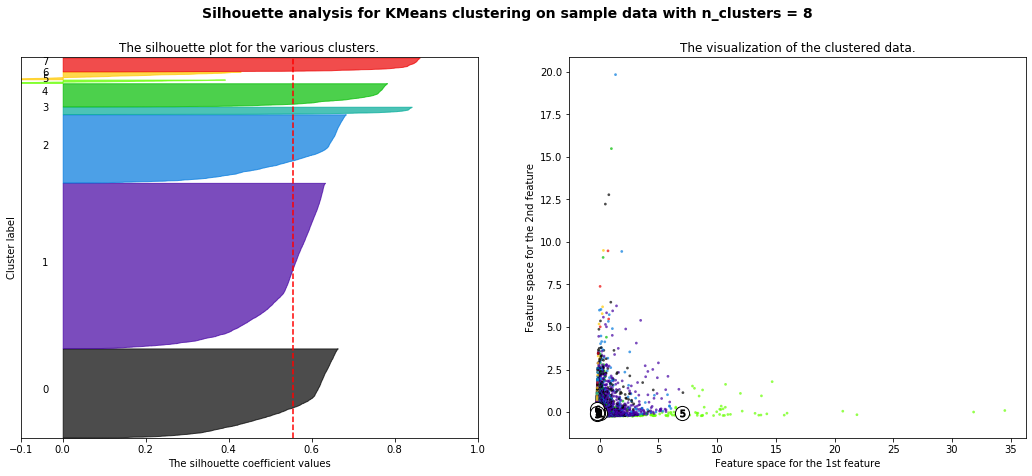

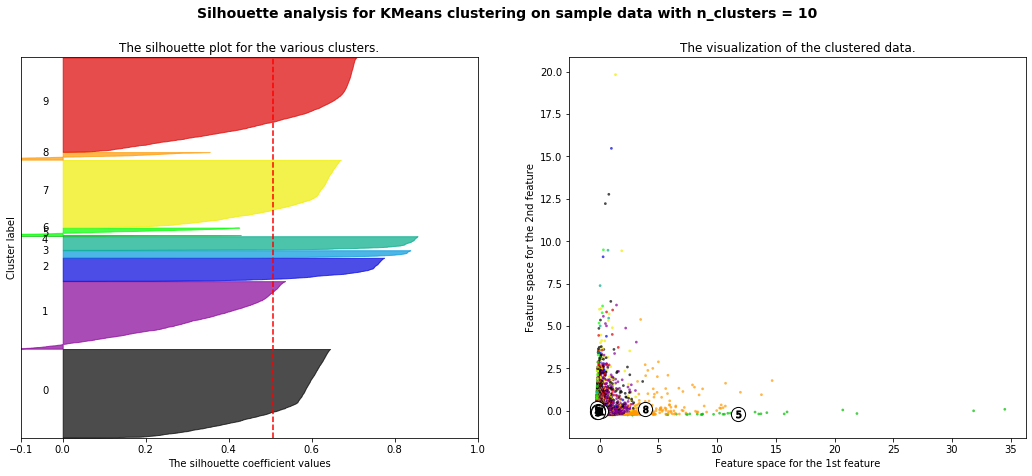

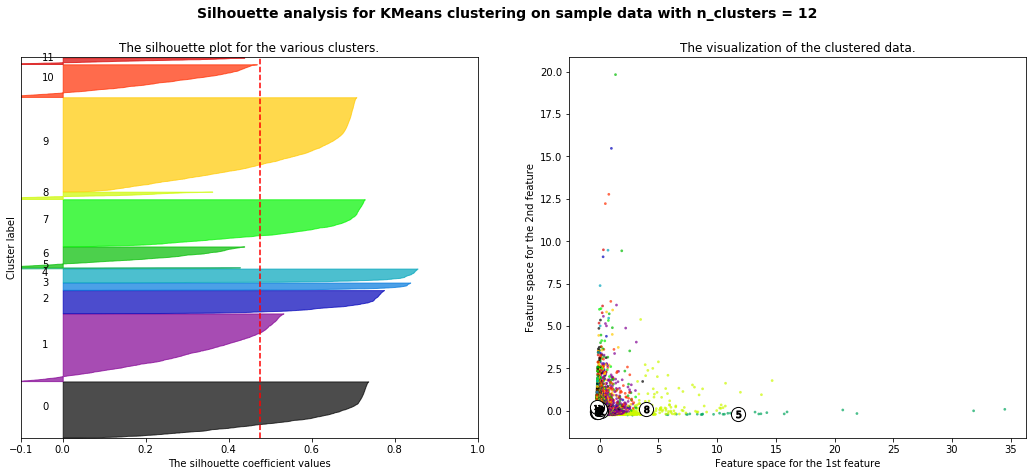

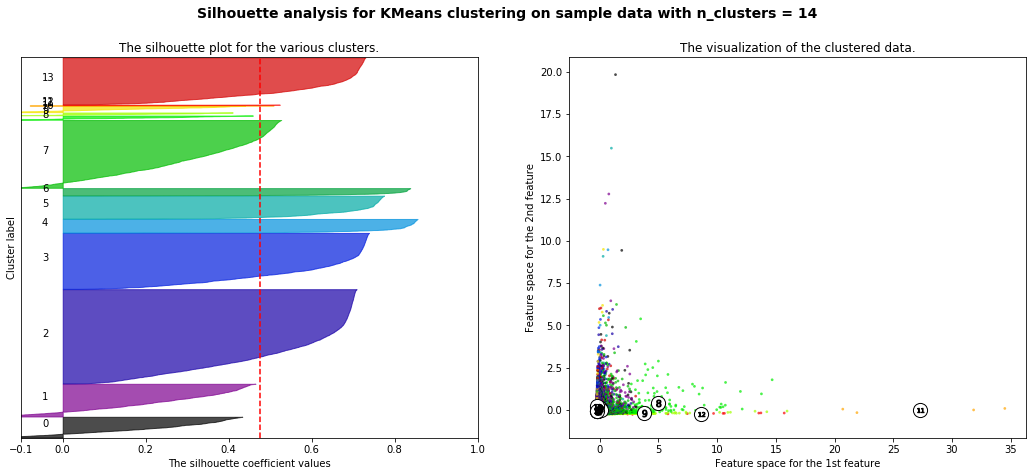

In [103]:
range_n_clusters = [4,8,10,12,14]
no_outlier = np.concatenate([X_stan[:59],X_stan[60:9091],X_stan[9092:10657],X_stan[10658:]])
#X = train.to_numpy()
silhouette(no_outlier, range_n_clusters, columns=[2,3])

For n_clusters = 4 The average silhouette_score is : 0.44035331530415134
For n_clusters = 8 The average silhouette_score is : 0.554707379514921
For n_clusters = 10 The average silhouette_score is : 0.5058374809651185
For n_clusters = 12 The average silhouette_score is : 0.47464370584834925
For n_clusters = 14 The average silhouette_score is : 0.4763798364269012


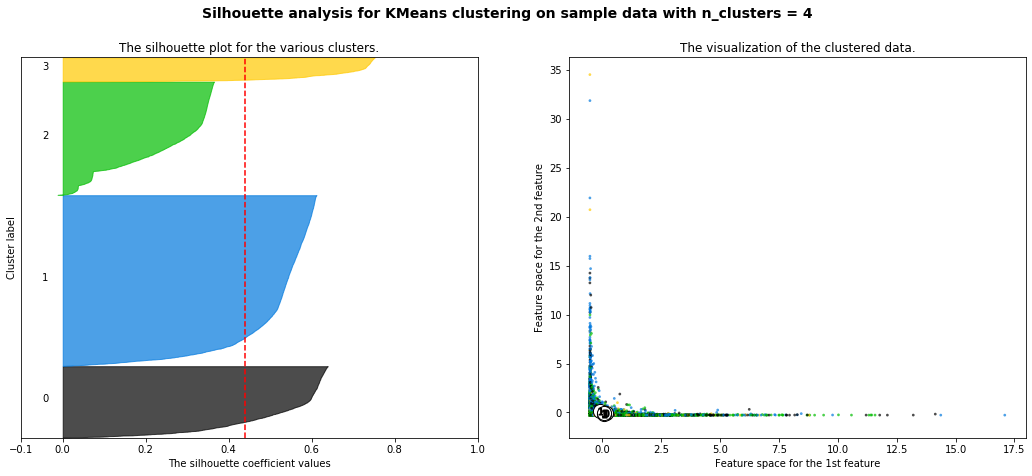

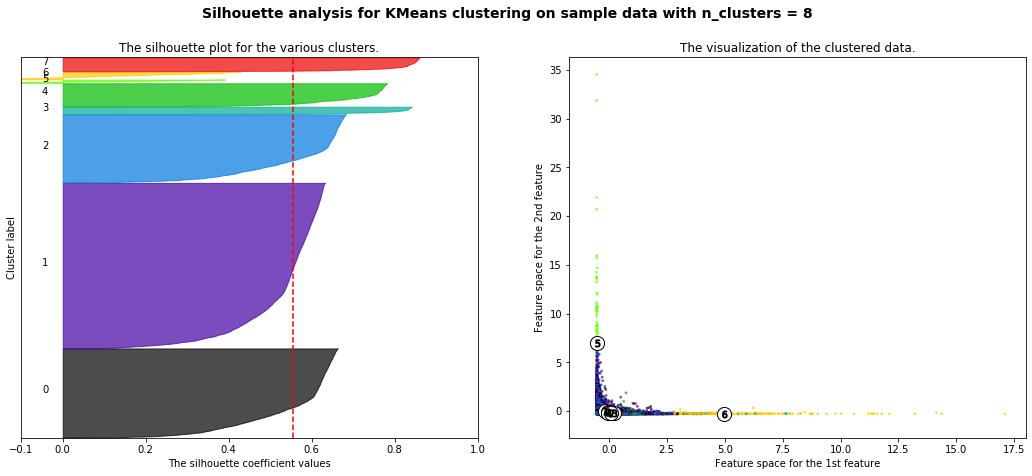

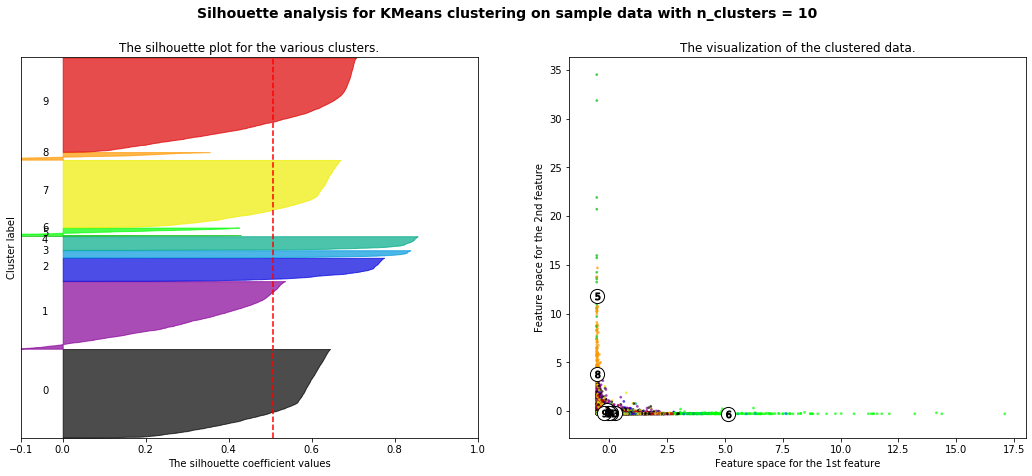

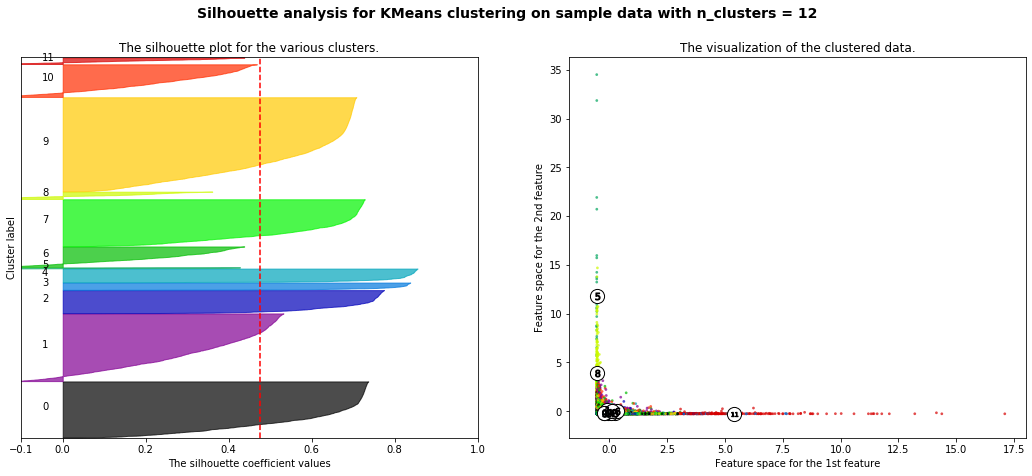

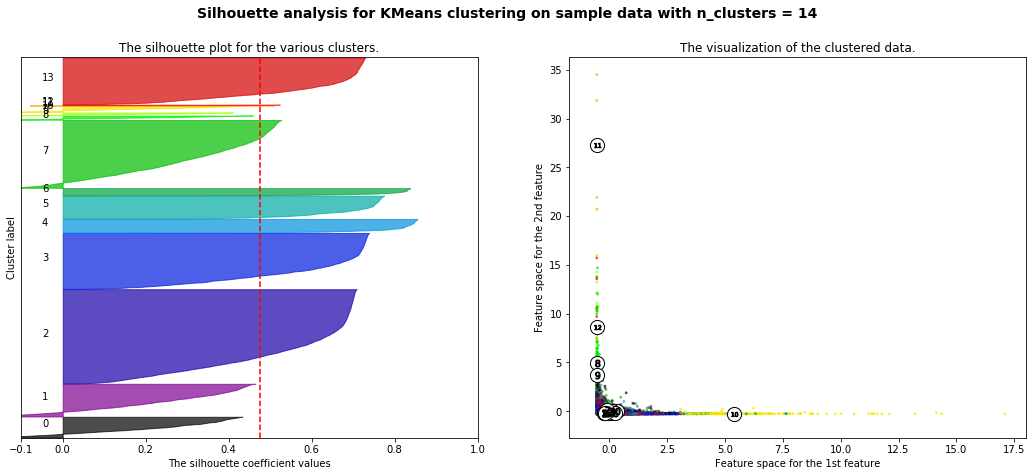

In [104]:
range_n_clusters = [4,8,10,12,14]
no_outlier = np.concatenate([X_stan[:59],X_stan[60:9091],X_stan[9092:10657],X_stan[10658:]])
#X = train.to_numpy()
silhouette(no_outlier, range_n_clusters, columns=[1,2])

For n_clusters = 4 The average silhouette_score is : 0.44035331530415134
For n_clusters = 8 The average silhouette_score is : 0.554707379514921
For n_clusters = 10 The average silhouette_score is : 0.5058374809651185
For n_clusters = 12 The average silhouette_score is : 0.47464370584834925
For n_clusters = 14 The average silhouette_score is : 0.4763798364269012


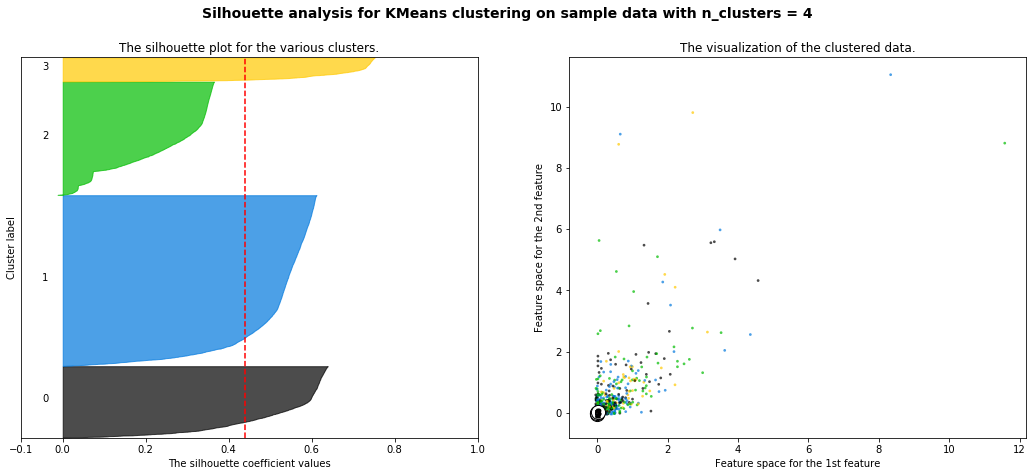

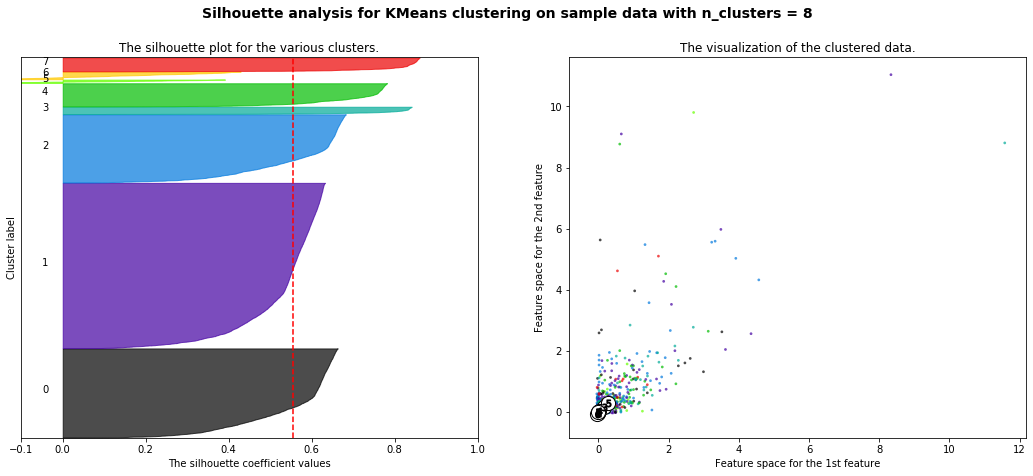

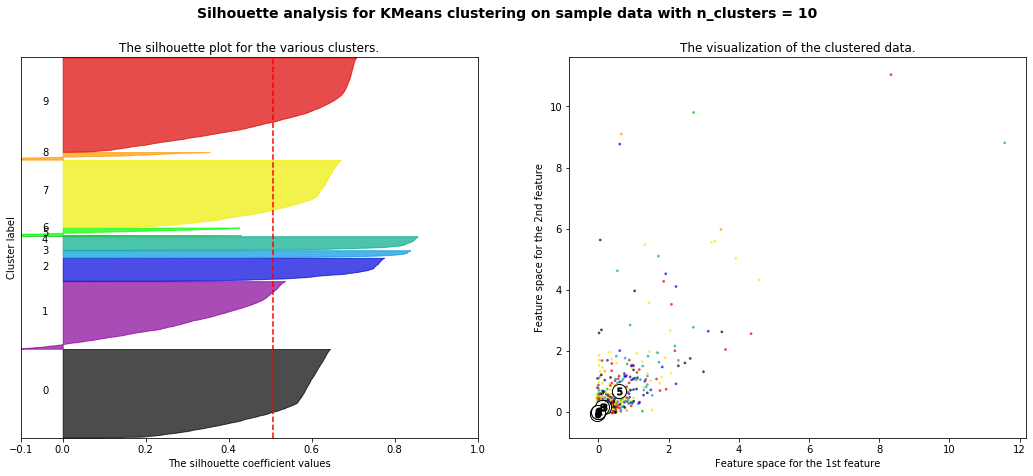

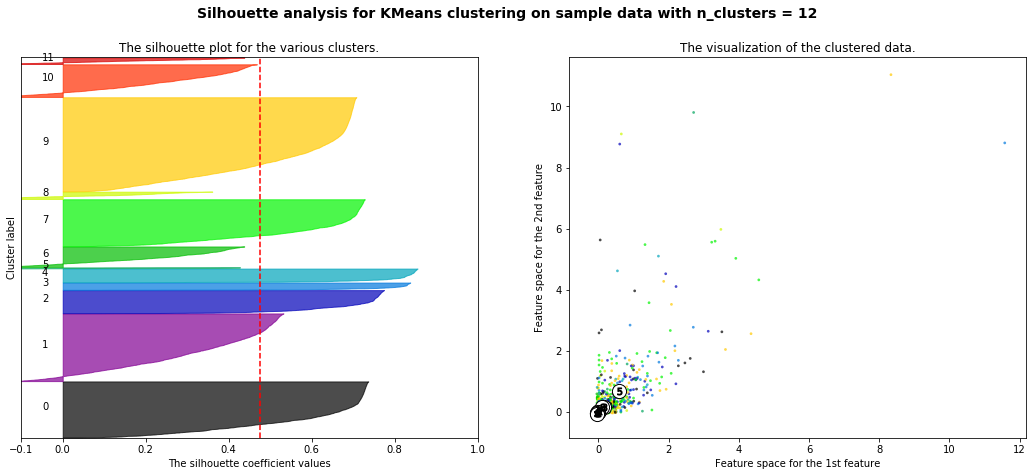

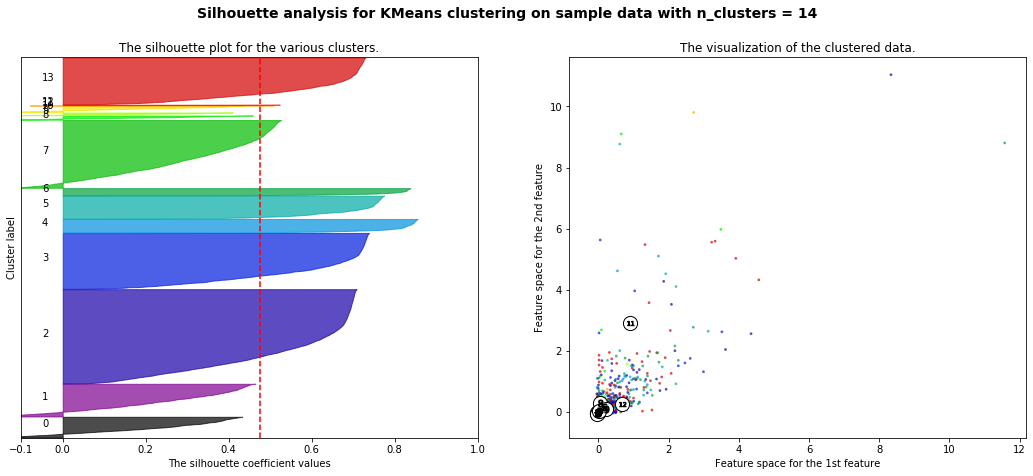

In [105]:
range_n_clusters = [4,8,10,12,14]
no_outlier = np.concatenate([X_stan[:59],X_stan[60:9091],X_stan[9092:10657],X_stan[10658:]])
#X = train.to_numpy()
silhouette(no_outlier, range_n_clusters, columns=[5,6])

For n_clusters = 8 The average silhouette_score is : 0.554707379514921
For n_clusters = 16 The average silhouette_score is : 0.48383988126198724
For n_clusters = 32 The average silhouette_score is : 0.4535184686547666
For n_clusters = 64 The average silhouette_score is : 0.38764437439807525


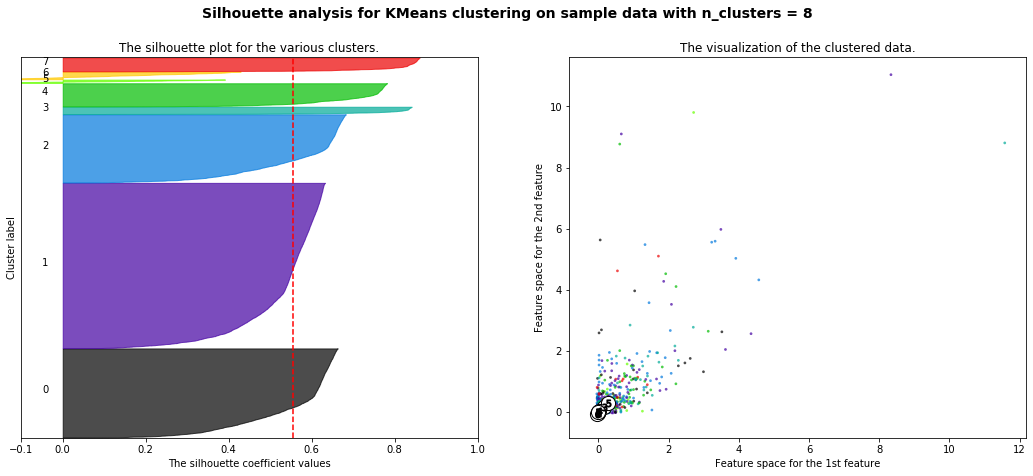

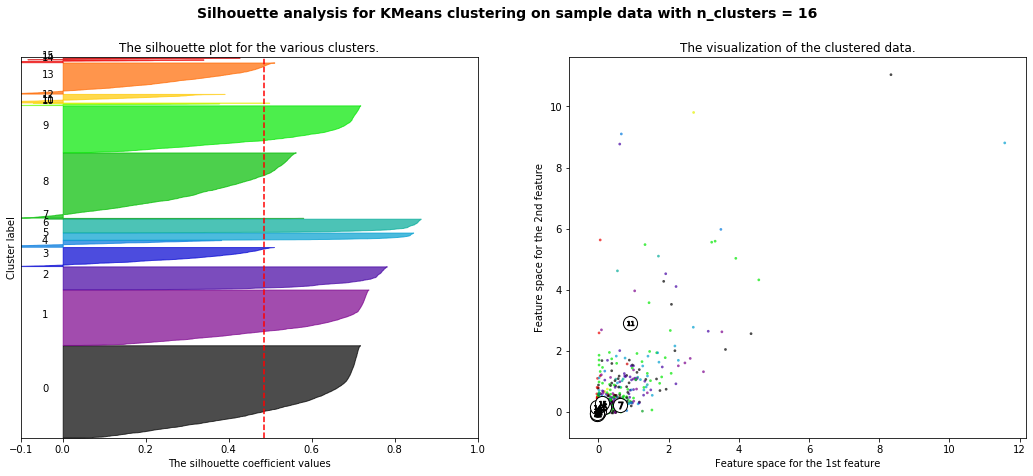

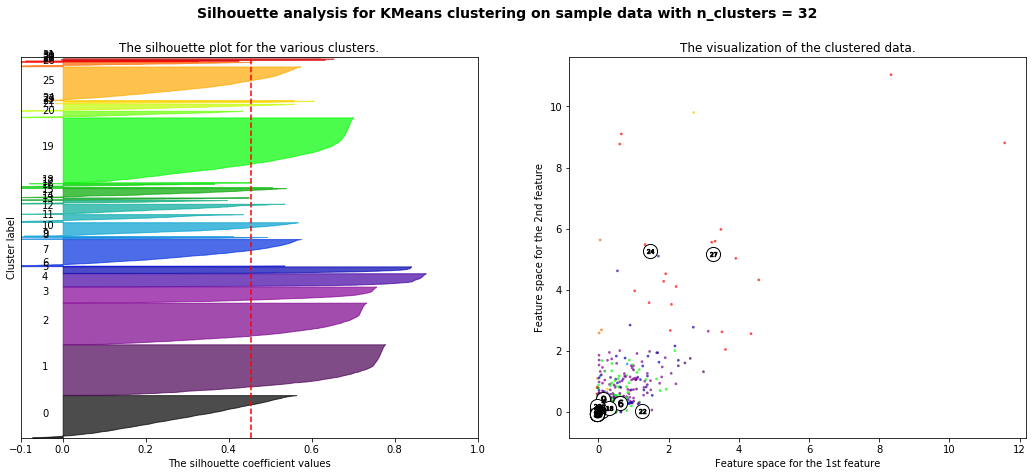

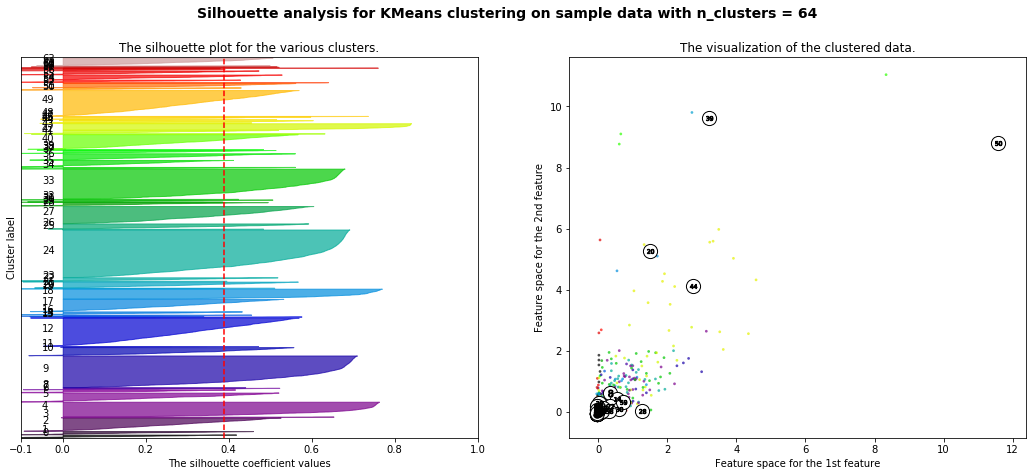

In [106]:
range_n_clusters = [8,16,32,64]
no_outlier = np.concatenate([X_stan[:59],X_stan[60:9091],X_stan[9092:10657],X_stan[10658:]])
#X = train.to_numpy()
silhouette(no_outlier, range_n_clusters, columns=[5,6])

In [107]:
train.columns

Index(['transaction_counts', 'time_btween', 'total_sales', 'sales_pertrans',
       'total_days', 'trans_perday', 'sales_perday', 'time_of_day_Late Night',
       'time_of_day_Early Morning', 'time_of_day_Morning', 'time_of_day_Noon',
       'time_of_day_Eve', 'time_of_day_Night'],
      dtype='object')

In [108]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04
mean,6.558193e-16,-1.590984e-16,1.208751e-15,1.968797e-16,3.823858e-16,6.232478e-17,-4.088340e-17,-1.249677e-14,-1.606353e-15,3.464911e-15,2.137828e-14,-1.146986e-14,-9.079804e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-2.093467e-01,-5.254091e-01,-2.699066e-01,-2.512866e-01,-1.113229e+00,-4.840311e-02,-5.563441e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,-9.042100e-01,-4.815726e-01,-1.961563e-01
25%,-2.039880e-01,-4.770202e-01,-2.622984e-01,-2.113305e-01,-9.060497e-01,-4.678673e-02,-5.407198e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,-9.042100e-01,-4.815726e-01,-1.961563e-01
50%,-1.879119e-01,-3.387095e-01,-2.379579e-01,-1.764454e-01,-2.795780e-01,-4.367761e-02,-4.994757e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,-9.042100e-01,-4.815726e-01,-1.961563e-01
75%,-1.128901e-01,4.015750e-02,-1.168409e-01,-7.098778e-02,7.612530e-01,-3.120995e-02,-3.569610e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,1.105938e+00,-4.815726e-01,-1.961563e-01
max,4.535747e+01,1.708734e+01,3.449910e+01,6.432970e+01,2.477884e+00,1.099182e+02,1.075828e+02,7.110910e+00,3.862115e+00,1.766687e+00,1.105938e+00,2.076530e+00,5.097976e+00


In [109]:
X.max(axis=0)   

array([ 45.35746989,  17.08733988,  34.4990988 ,  64.32970455,
         2.47788411, 109.91821612, 107.58277189,   7.11090997,
         3.86211532,   1.7666869 ,   1.10593783,   2.07652993,
         5.09797624])

In [110]:
train.columns

Index(['transaction_counts', 'time_btween', 'total_sales', 'sales_pertrans',
       'total_days', 'trans_perday', 'sales_perday', 'time_of_day_Late Night',
       'time_of_day_Early Morning', 'time_of_day_Morning', 'time_of_day_Noon',
       'time_of_day_Eve', 'time_of_day_Night'],
      dtype='object')

### using k = 10 and try different method and see the performance

In [190]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [191]:
gms = GaussianMixture(n_components=10, random_state=10)
# gms.fit(d)
# total.append(gms.aic(d))
gms_cluster_labels = gms.fit_predict(X)

In [113]:
pd.DataFrame(cluster_labels).value_counts()

6    5545
0    2989
5    2289
8     778
4     461
7     262
3     245
1     113
9       2
2       1
dtype: int64

In [114]:
pd.DataFrame(gms_cluster_labels).value_counts()

6    4977
0    2684
5    2012
1     914
8     719
7     660
4     470
3     246
9       2
2       1
dtype: int64

In [135]:
agg_mer.shape

(12685, 10)

In [136]:
gms_cluster_labels.shape

(12685,)

In [213]:
aa = pd.DataFrame(np.array([gms_cluster_labels,cluster_labels]).T,columns=['em','kmeans'],index=agg_mer.index)

In [220]:
aa['abs_diff'] = abs(aa.em-aa.kmeans)
aa.abs_diff.describe()

count    12685.000000
mean         0.364289
std          1.299687
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: abs_diff, dtype: float64

### clustering information
inverse cluster center back to see what exactly they are.
* 2 and 9 are outliers with large amounts per transactions and large number of transactions
* 8 are early morning, 0 morning; 
* 3 is late night, 4 late night, international business?; 5 evening. newer merchants, lower to medium transaction and amount; maybe when stripe expend to international business. support in the night to help growth? cold start problem?
* 1 is merchants that have been with stripe the longest, loyal customer, more trasactions as well. power users. market place?
* 6 is largest more at noon, transaction is the third highest; dining services?
* 7 is lowest in transactions, sales per day, really not much impact, but they do stay for the second longest. small busines owners? might want to pay not too much attention, maybe help them out a bit, in case they churn or go down?
* 0, 4th largest in terms of total transactions, in the morning, on average sales. newer than 7, businesss starting up?

In [209]:
sts = StandardScaler()
somethign = sts.fit_transform(train)

pd.DataFrame(sts.inverse_transform(clusterer.cluster_centers_), columns=train.columns)

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
0,75.648377,1.528726e+06,1.162637e+06,3.428141e+04,218.615256,0.777713,1.160831e+04,-2.289835e-16,2.220446e-16,1.000000e+00,2.942091e-15,1.415534e-15,-3.191891e-16
1,4228.265487,2.529346e+04,4.954747e+07,3.155151e+04,529.097345,9.550135,1.392021e+05,-3.816392e-17,3.539823e-02,1.858407e-01,6.283186e-01,1.504425e-01,3.469447e-17
2,3358.000000,1.580280e+01,4.384030e+07,1.305548e+04,1.000000,3358.000000,4.384030e+07,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,26.685714,2.741915e+06,3.262650e+05,2.336264e+04,80.195918,6.617550,8.338482e+04,1.000000e+00,5.551115e-17,-2.498002e-16,2.775558e-16,2.775558e-17,4.857226e-17
4,10.824295,2.222333e+06,2.622124e+05,2.988760e+04,98.900217,1.017067,2.183794e+04,5.551115e-17,1.387779e-16,-2.775558e-16,-9.992007e-16,-4.718448e-16,1.000000e+00
5,60.529489,1.812915e+06,1.171954e+06,3.742833e+04,178.966361,1.380754,2.349423e+04,-8.673617e-17,2.220446e-16,1.526557e-15,3.330669e-16,1.000000e+00,-2.914335e-16
6,110.777638,1.227745e+06,1.923218e+06,3.115626e+04,266.568620,0.898319,1.437869e+04,-3.747003e-16,-2.164935e-15,1.193490e-15,1.000000e+00,-1.970646e-15,-3.747003e-16
7,2.851145,1.946777e+07,1.649370e+05,5.853011e+04,373.000000,0.008216,4.730528e+02,3.816794e-03,5.343511e-02,2.595420e-01,3.396947e-01,3.091603e-01,3.435115e-02
8,51.015424,1.749691e+06,7.011316e+05,3.120986e+04,142.964010,2.298618,3.631695e+04,5.898060e-17,1.000000e+00,-4.718448e-16,-9.436896e-16,-4.996004e-16,-3.469447e-17
9,4.500000,2.934809e+06,3.983537e+07,8.834725e+06,97.500000,0.046234,4.092882e+05,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00


In [210]:
1/0.7777713

1.2857249939667355

### only about 1000 difference out  of 12685

In [146]:
sum(aa.em-aa.kmeans)

-1639

In [148]:
(aa.em-aa.kmeans).describe()

count    12685.000000
mean        -0.129208
std          1.343579
min         -7.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
dtype: float64

In [115]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(X)
pd.DataFrame(clustering.labels_).value_counts()




 1     5688
 3     3067
 2     2378
 4      789
 8      467
 7      245
-1       36
 0        5
 5        2
 6        2
 9        2
 10       2
 11       2
dtype: int64

### extra feature with tsfresh

In [116]:
df.head()

,merchant,time,amount_usd_in_cents,hours
1,faa029c6b0,2034-06-17 23:34:14,6349,23
2,ed7a7d91aa,2034-12-27 00:40:38,3854,0
3,5608f200cf,2034-04-30 01:29:42,789,1
4,15b1a0d61e,2034-09-16 01:06:23,4452,1
5,4770051790,2034-07-22 16:21:42,20203,16


In [117]:
from tsfresh import extract_features


C:\Users\xiaoyal\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [118]:
from tsfresh import extract_features, select_features, extract_relevant_features


In [119]:
from tsfresh.feature_extraction.extraction import extract_features
extracted_features = extract_features(df.iloc[:,:-1], column_id="merchant", column_sort="time")

Feature Extraction: 100%|███████████████████████████████████████████████████████████| 10/10 [1:30:38<00:00, 543.85s/it]


In [120]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
#features_filtered = select_features(extracted_features, y)

NameError: name 'y' is not defined

In [121]:
extracted_features.shape

(14351, 779)

In [123]:
extracted_features.to_pickle('extracted_features.pkl')

In [153]:
extracted_features.columns[extracted_features.isna().any()]

Index([], dtype='object')

In [126]:
extracted_features.head()

,amount_usd_in_cents__variance_larger_than_standard_deviation,amount_usd_in_cents__has_duplicate_max,amount_usd_in_cents__has_duplicate_min,amount_usd_in_cents__has_duplicate,amount_usd_in_cents__sum_values,amount_usd_in_cents__abs_energy,amount_usd_in_cents__mean_abs_change,amount_usd_in_cents__mean_change,amount_usd_in_cents__mean_second_derivative_central,amount_usd_in_cents__median,...,amount_usd_in_cents__fourier_entropy__bins_2,amount_usd_in_cents__fourier_entropy__bins_3,amount_usd_in_cents__fourier_entropy__bins_5,amount_usd_in_cents__fourier_entropy__bins_10,amount_usd_in_cents__fourier_entropy__bins_100,amount_usd_in_cents__permutation_entropy__dimension_3__tau_1,amount_usd_in_cents__permutation_entropy__dimension_4__tau_1,amount_usd_in_cents__permutation_entropy__dimension_5__tau_1,amount_usd_in_cents__permutation_entropy__dimension_6__tau_1,amount_usd_in_cents__permutation_entropy__dimension_7__tau_1
0002b63b92,0.0,0.0,0.0,0.0,3379.0,1.141764e+07,6704.346154,1.040465,0.000000,3379.0,...,0.562335,0.721464,1.088900,1.386294,1.945910,1.676988,2.484367,2.925203,3.120292,3.218876
0002d07bba,1.0,0.0,0.0,0.0,89278.0,3.388253e+09,26692.666667,-1164.000000,-18516.500000,21689.5,...,0.636514,0.636514,0.636514,1.098612,1.098612,0.693147,-0.000000,2.925203,3.120292,3.218876
00057d4302,1.0,0.0,0.0,1.0,29521.0,4.758108e+07,550.444444,0.000000,8.538462,752.0,...,0.690923,1.009614,1.415369,1.806507,2.430791,1.479133,2.289788,2.809678,3.075221,3.091042
000bcff341,0.0,0.0,0.0,0.0,7826.0,6.124628e+07,6704.346154,1.040465,0.000000,7826.0,...,0.562335,0.721464,1.088900,1.386294,1.945910,1.676988,2.484367,2.925203,3.120292,3.218876
000ddbf0ca,0.0,0.0,0.0,0.0,10299.0,1.060694e+08,6704.346154,1.040465,0.000000,10299.0,...,0.562335,0.721464,1.088900,1.386294,1.945910,1.676988,2.484367,2.925203,3.120292,3.218876


In [129]:
len(set(extracted_features.index))

14351

In [131]:
len(set(agg_mer.index))

12685

In [134]:
len(set(extracted_features.index) - set(agg_mer.index))

1666

In [155]:
agg_mer.join(extracted_features).shape

(12685, 789)

In [161]:
withtsfeatures = train.join(extracted_features)

In [162]:
withtsfeatures.shape

(12685, 792)

In [168]:
import numpy as np
from sklearn.decomposition import PCA

stan_ts_feature = StandardScaler().fit_transform(withtsfeatures)
pca = PCA(n_components=150)
pca.fit(stan_ts_feature)
print(sum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)

#print(pca.singular_values_)

0.7845177390563947


In [186]:
import numpy as np
from sklearn.decomposition import PCA

stan_ts_feature = StandardScaler().fit_transform(withtsfeatures)
pca = PCA(n_components=50)
pca.fit(stan_ts_feature)
print(sum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)

#print(pca.singular_values_)

0.5966462734660402


In [187]:
pca_feature = pca.transform(stan_ts_feature)

In [188]:
pca_feature.shape

(12685, 50)

In [183]:
pd.DataFrame(pca_feature).describe()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
count,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,...,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04
mean,-3.069870e-15,1.334701e-15,9.103601e-15,3.039587e-15,5.961333e-16,-1.554719e-15,-2.014768e-17,3.910331e-15,-7.999207e-16,-4.960776e-17,...,1.049920e-16,-1.832393e-17,2.076143e-17,1.641922e-17,-2.905747e-17,1.545648e-17,-3.789670e-17,-3.850990e-19,-1.536458e-17,-3.866854e-17
std,9.697170e+00,6.860640e+00,5.560675e+00,4.691625e+00,4.568116e+00,4.032266e+00,3.973960e+00,3.768716e+00,3.472776e+00,3.368574e+00,...,1.026394e+00,1.022472e+00,1.018808e+00,1.017966e+00,1.016550e+00,1.013121e+00,1.007607e+00,1.004670e+00,1.000625e+00,9.978652e-01
min,-3.505978e+00,-9.059396e+01,-6.619164e+01,-2.055695e+02,-8.584029e+01,-1.018287e+02,-1.957234e+02,-9.963222e+01,-1.107807e+02,-9.350404e+01,...,-9.467874e+00,-1.166710e+01,-1.064732e+01,-1.333552e+01,-9.226800e+00,-1.673513e+01,-9.504366e+00,-1.844040e+01,-9.619977e+00,-1.608532e+01
25%,-2.326737e+00,-1.743822e+00,-2.960923e+00,-1.330076e+00,-1.678912e+00,-2.421183e-01,-6.855677e-01,-1.046012e+00,-1.270991e+00,-6.180808e-01,...,-4.743031e-01,-4.257606e-01,-3.973836e-01,-4.015780e-01,-3.757479e-01,-3.761702e-01,-4.345591e-01,-3.333798e-01,-4.236410e-01,-4.114248e-01
50%,-1.737957e+00,-1.363052e+00,3.192748e-01,4.099054e-01,-1.237594e-01,4.595408e-01,-2.375095e-01,7.980116e-01,-1.947052e-01,-1.590277e-01,...,-1.913422e-02,3.299957e-02,3.326502e-02,9.721762e-03,4.965792e-03,-1.259914e-02,-2.880590e-02,2.467335e-03,1.741815e-02,-5.169653e-02
75%,-8.480764e-01,-5.125121e-01,3.485035e+00,1.415358e+00,1.747106e+00,8.566956e-01,2.069945e-01,1.764575e+00,9.653260e-01,4.619607e-01,...,4.604034e-01,4.529239e-01,3.855819e-01,4.171884e-01,3.735568e-01,3.729345e-01,4.527119e-01,3.130090e-01,4.004694e-01,4.185714e-01
max,5.809482e+02,3.791792e+02,3.316328e+02,2.376902e+02,2.182434e+02,2.229990e+02,2.707852e+02,1.379306e+02,1.701049e+02,2.637608e+02,...,2.247532e+01,1.510306e+01,2.773477e+01,2.152915e+01,1.567162e+01,2.271847e+01,1.877164e+01,2.297631e+01,1.790549e+01,2.824242e+01


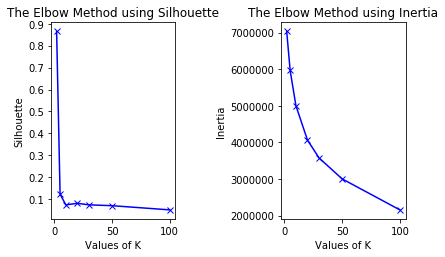

In [185]:
#K = [2,4,6,8,10]
K = [2,5,10,20,30,50,100]

#K = range(3,20)

sih,distortions,inertias = kmeans_elbow(K,pca_feature,seed = 10)

fig, axs = plt.subplots(1, 2)
#fig.suptitle('Deciding number of clusters', fontsize=16)
axs[0].plot(K, sih, 'bx-')

#plt.plot(K, sih, 'bx-') 
axs[0].set_xlabel('Values of K') 
axs[0].set_ylabel('Silhouette') 
axs[0].title.set_text('The Elbow Method using Silhouette') 

# plt.plot(inertias, 'bx-') 
axs[1].plot(K, inertias, 'bx-')
axs[1].set_xlabel('Values of K') 
axs[1].set_ylabel('Inertia') 
#plt.xticks(range(len(ks)), ks)
axs[1].title.set_text('The Elbow Method using Inertia') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### 150 features; 75% explained variance

For n_clusters = 2 The average silhouette_score is : 0.8652835961036316
For n_clusters = 4 The average silhouette_score is : 0.8114784469305216
For n_clusters = 8 The average silhouette_score is : 0.10586771946225061
For n_clusters = 10 The average silhouette_score is : 0.0735811653371763
For n_clusters = 14 The average silhouette_score is : 0.07641025684361065


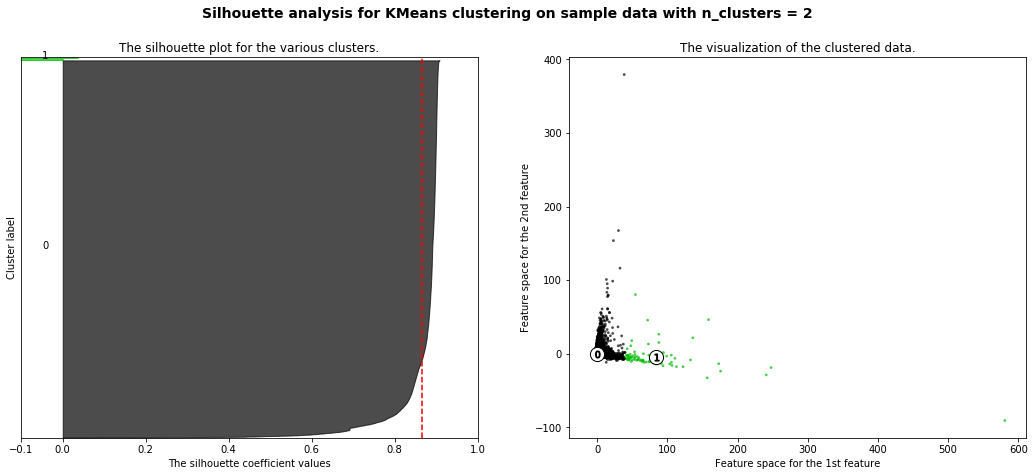

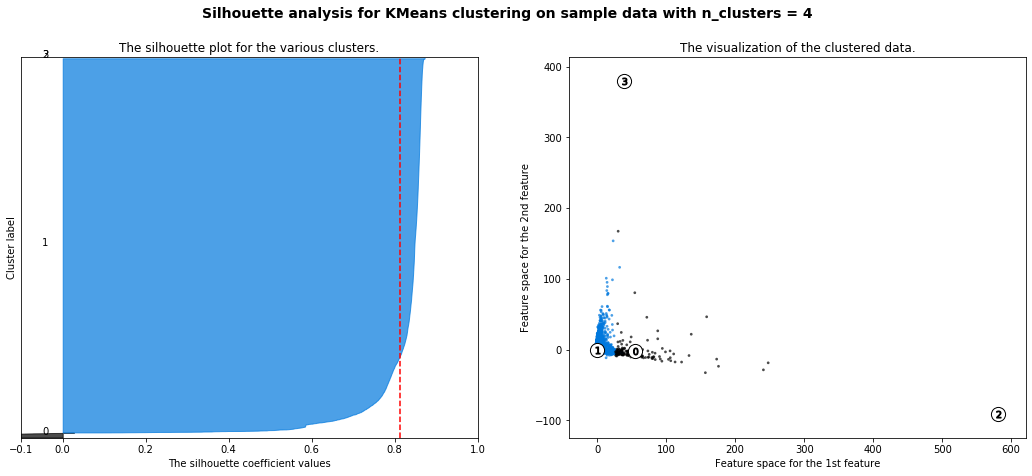

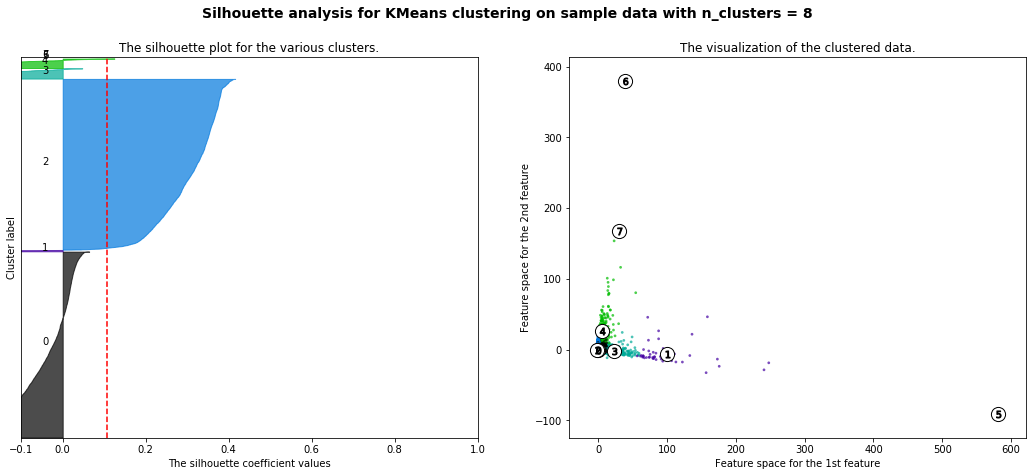

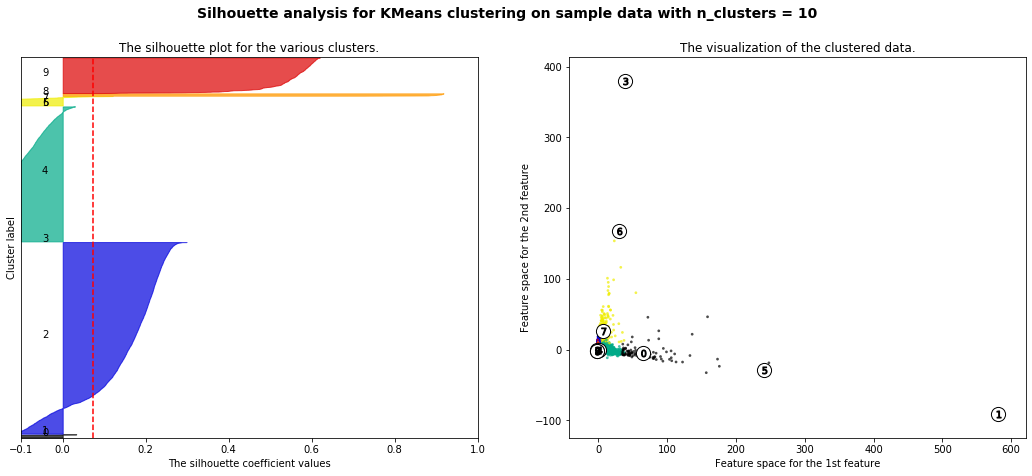

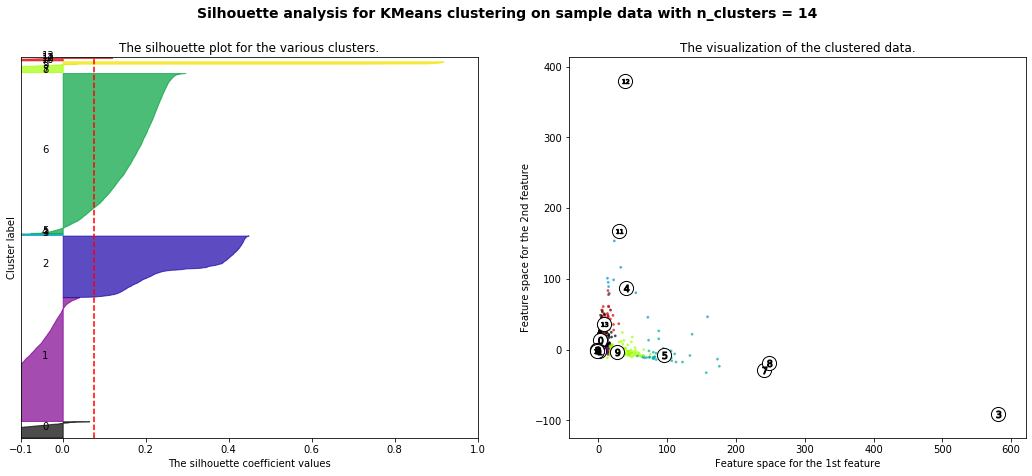

In [173]:
range_n_clusters = [2,4,8,10,14]#[8,16,32,64]
#no_outlier = np.concatenate([X_stan[:59],X_stan[60:9091],X_stan[9092:10657],X_stan[10658:]])

#X = train.to_numpy()
silhouette(pca_feature, range_n_clusters, columns=[0,1])

### 50 features 60 explained variance

For n_clusters = 2 The average silhouette_score is : 0.8821925714949372
For n_clusters = 4 The average silhouette_score is : 0.6903366464716177
For n_clusters = 8 The average silhouette_score is : 0.2187357296049916
For n_clusters = 10 The average silhouette_score is : 0.2183811004474241
For n_clusters = 14 The average silhouette_score is : 0.22442713898250788


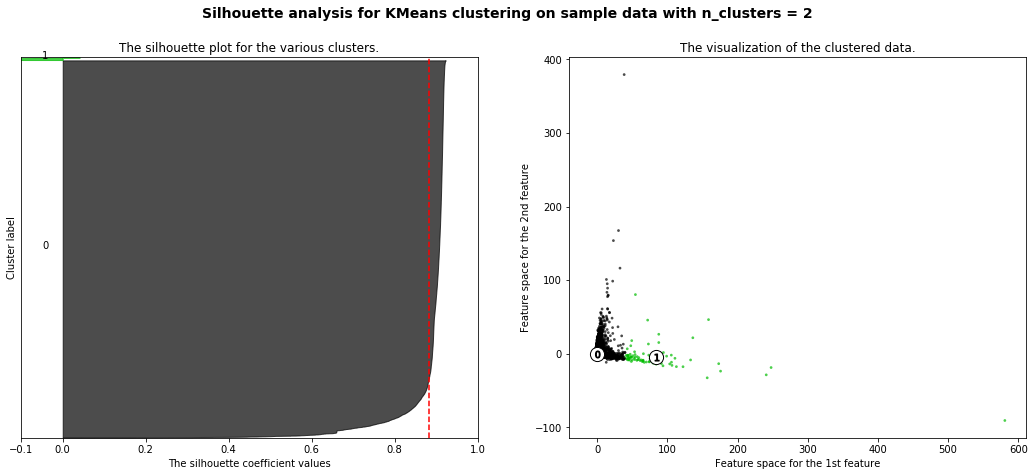

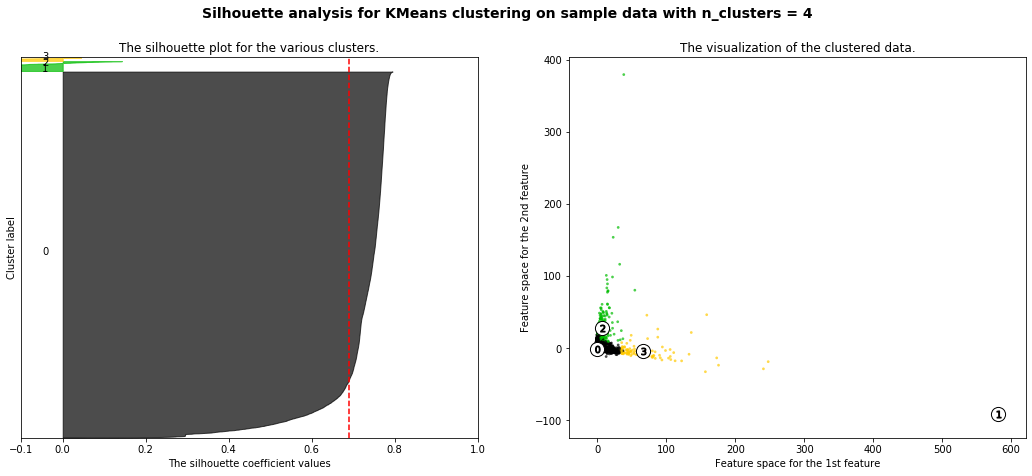

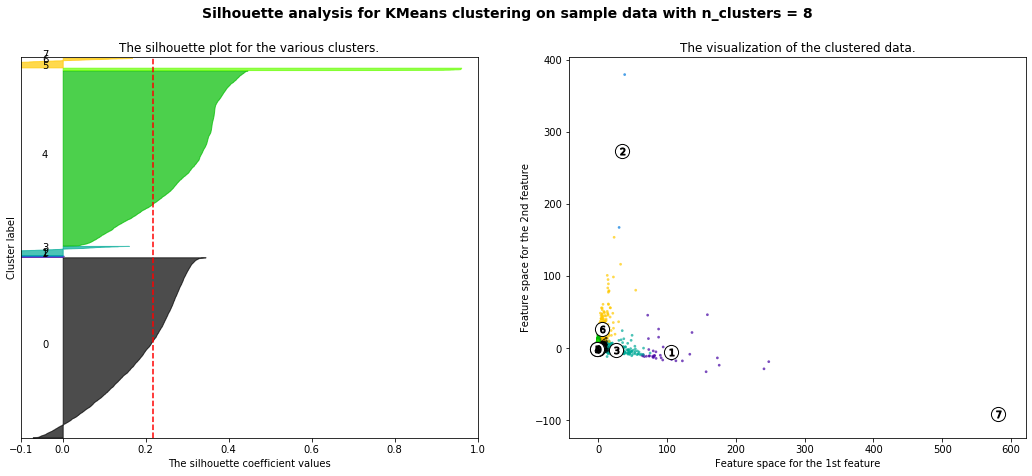

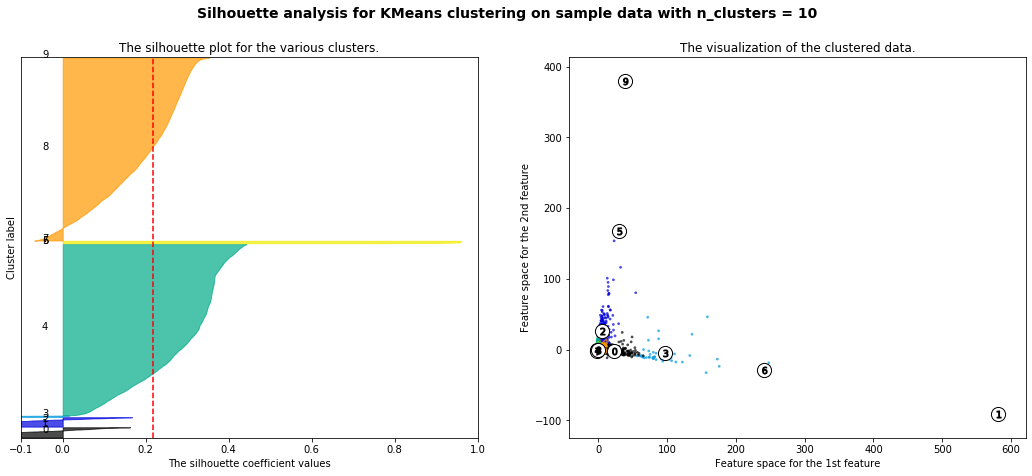

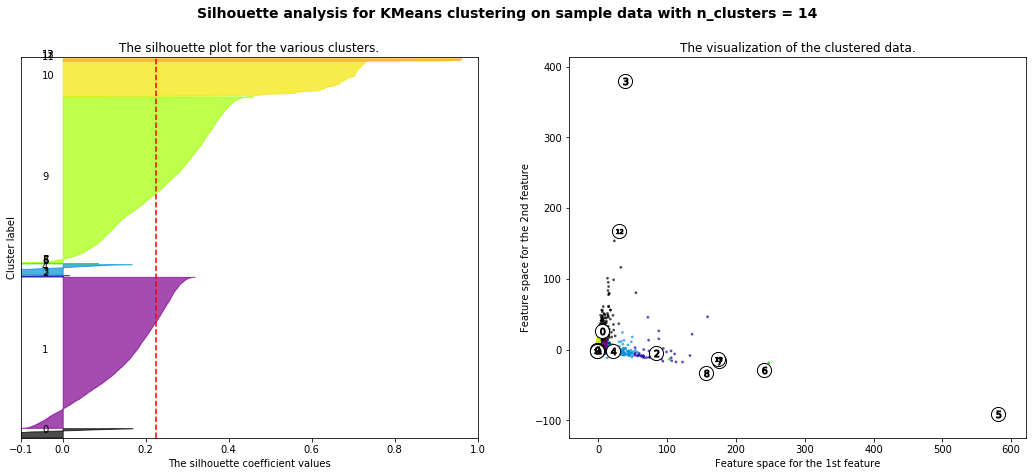

In [189]:
range_n_clusters = [2,4,8,10,14]#[8,16,32,64]
#no_outlier = np.concatenate([X_stan[:59],X_stan[60:9091],X_stan[9092:10657],X_stan[10658:]])

#X = train.to_numpy()
silhouette(pca_feature, range_n_clusters, columns=[0,1])

In [178]:
clusterer = KMeans(n_clusters=4, random_state=10)
pca_cluster_labels = clusterer.fit_predict(pca_feature)

In [179]:
gms = GaussianMixture(n_components=4, random_state=10)
# gms.fit(d)
# total.append(gms.aic(d))
pca_gms_cluster_labels = gms.fit_predict(pca_feature)

In [180]:
pd.DataFrame(pca_cluster_labels).value_counts()

1    12523
0      160
2        1
3        1
dtype: int64

In [181]:
pd.DataFrame(pca_cluster_labels).value_counts()

1    12523
0      160
2        1
3        1
dtype: int64

In [143]:
aa = pd.DataFrame(np.array([gms_cluster_labels,cluster_labels]).T,columns=['em','kmeans'])

### only about 1000 difference out  of 12685

In [146]:
sum(aa.em-aa.kmeans)

-1639

In [148]:
(aa.em-aa.kmeans).describe()

count    12685.000000
mean        -0.129208
std          1.343579
min         -7.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
dtype: float64

0.37050153190008184

### Q2: Churn prediction
#### Define Churn
use a days between transactions distribution(normal, poisson or exponential), time interval 1 week, 1 day, 1 month?
get the exponential and determine threshold for churn. would be nice to have label.
* calcuate individual distribution according to clustering label in q1
* two way to get the cut off threshold: 1 assume exponential, then use reverse cdf to get 0.9; 2. use empirical number then cut 0.9 point; if has churn label, this could be decided

In [230]:
train_k = train.join(pd.DataFrame(cluster_labels, index=train.index,columns=['cluster']))

In [231]:
train_k.head()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night,cluster
merchant,,,,,,,,,,,,,,
5608f200cf,25512,2171.964133,20911571,819.675878,642,39.738318,32572.540498,0,0,1,0,0,0,1
53b3fbeae2,12178,2812.583723,60733740,4987.168665,397,30.675063,152981.712846,0,0,1,0,0,0,1
1ddaea9838,12042,5214.221576,41443545,3441.583209,727,16.563961,57006.251719,0,0,0,1,0,0,1
89e2d29885,11969,5083.599432,18054500,1508.438466,705,16.977305,25609.219858,0,0,0,1,0,0,1
654930c922,11222,5529.964263,151116295,13466.075120,719,15.607789,210175.653686,0,0,1,0,0,0,1


### cluster average to fit exponential distribution

In [235]:
train_k.groupby(['cluster']).time_btween.mean()

cluster
0    1.528726e+06
1    2.529346e+04
2    1.580280e+01
3    2.741915e+06
4    2.222333e+06
5    1.812915e+06
6    1.227745e+06
7    1.946777e+07
8    1.749691e+06
9    2.934809e+06
Name: time_btween, dtype: float64

In [240]:
np.log(2)

0.6931471805599453

In [241]:
def inverse_cdf(lam, confi=0.9):
    return -np.log(1-confi)*lam
    

In [242]:
cut_off = inverse_cdf(train_k.groupby(['cluster']).time_btween.mean())

In [248]:
cut_off 

cluster
0    3.520021e+06
1    5.824035e+04
2    3.638729e+01
3    6.313493e+06
4    5.117111e+06
5    4.174392e+06
6    2.826988e+06
7    4.482620e+07
8    4.028812e+06
9    6.757648e+06
Name: time_btween, dtype: float64

In [249]:
train_k['theoretical_label'] = train_k.apply(lambda x:int(x['time_btween']>cut_off[x['cluster']]), axis=1)

In [251]:
train_k.theoretical_label.value_counts()

0    11115
1     1570
Name: theoretical_label, dtype: int64

In [261]:
train_k.sort_values(['time_btween','cluster'])

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night,cluster,theoretical_label
merchant,,,,,,,,,,,,,,,
0b0ea71d37,3358,15.802800,43840305,13055.480941,1,3358.0,43840305.0,0,1,0,0,0,0,2,0
21313c3ba6,2,28.000000,21598,10799.000000,1,2.0,21598.0,0,0,0,0,0,1,4,0
2cf437d4b7,355,91.601695,3609400,10167.323944,1,355.0,3609400.0,1,0,0,0,0,0,3,0
7501e80e92,121,117.891667,2070485,17111.446281,1,121.0,2070485.0,0,0,0,0,1,0,5,0
fe761a32a7,2,127.000000,7532,3766.000000,1,2.0,7532.0,1,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d4870f328b,14,971.923077,72581,5184.357143,1,14.0,72581.0,0,0,0,0,1,0,5,0
1187bdd21c,8,973.857143,61226,7653.250000,1,8.0,61226.0,1,0,0,0,0,0,3,0
d5592cfb26,5,974.750000,19290,3858.000000,1,5.0,19290.0,0,1,0,0,0,0,8,0


In [262]:
train_k[train_k.cluster.isin([9,2])]

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night,cluster,theoretical_label
merchant,,,,,,,,,,,,,,,
0b0ea71d37,3358,1.580280e+01,43840305,1.305548e+04,1,3358.000000,4.384030e+07,0,1,0,0,0,0,2,0
b993083163,6,1.674654e+06,53324791,8.887465e+06,97,0.061856,5.497401e+05,0,0,0,1,0,0,9,0
0838e4078e,3,4.194964e+06,26345953,8.781984e+06,98,0.030612,2.688363e+05,0,0,0,0,1,0,9,0


In [264]:
train_k.cluster.value_counts()

6    5545
0    2989
5    2289
8     778
4     461
7     262
3     245
1     113
9       2
2       1
Name: cluster, dtype: int64

In [280]:
empirical_cutoff = []
def get_empirical(df):
    #temp = df.sort_values(['time_btween','cluster'])
    counts = df.cluster.value_counts()
    for i in counts.index:
        temp = df[df.cluster==i].sort_values(['time_btween','cluster'])
        thres = temp.iloc[int(0.9*temp.shape[0]),2]
        df.loc[df.cluster==i,'empirical_label'] = temp.time_btween>thres
        return df

In [282]:
train_k_eandt = get_empirical(train_k)
train_k_eandt.head()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night,cluster,theoretical_label,empirical_label
merchant,,,,,,,,,,,,,,,,
5608f200cf,25512,2171.964133,20911571,819.675878,642,39.738318,32572.540498,0,0,1,0,0,0,1,0,NaN
53b3fbeae2,12178,2812.583723,60733740,4987.168665,397,30.675063,152981.712846,0,0,1,0,0,0,1,0,NaN
1ddaea9838,12042,5214.221576,41443545,3441.583209,727,16.563961,57006.251719,0,0,0,1,0,0,1,0,NaN
89e2d29885,11969,5083.599432,18054500,1508.438466,705,16.977305,25609.219858,0,0,0,1,0,0,1,0,NaN
654930c922,11222,5529.964263,151116295,13466.075120,719,15.607789,210175.653686,0,0,1,0,0,0,1,0,NaN


In [309]:
label_counts = train_k.cluster.value_counts()
train_k['empirical'] = 0
for i in label_counts.index:
    empirical_cutoff = int(label_counts[i]*0.9)
    print(empirical_cutoff)
    train_k.loc[train_k.cluster==i,'empirical'] = train_k.time_btween.apply(lambda x:int(x > empirical_cutoff))

4990
2690
2060
700
414
235
220
101
1
0


In [308]:
train_k.head()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night,cluster,theoretical_label,empirical_label,empirical
merchant,,,,,,,,,,,,,,,,,
5608f200cf,25512,2171.964133,20911571,819.675878,642,39.738318,32572.540498,0,0,1,0,0,0,1,0,NaN,1
53b3fbeae2,12178,2812.583723,60733740,4987.168665,397,30.675063,152981.712846,0,0,1,0,0,0,1,0,NaN,1
1ddaea9838,12042,5214.221576,41443545,3441.583209,727,16.563961,57006.251719,0,0,0,1,0,0,1,0,NaN,1
89e2d29885,11969,5083.599432,18054500,1508.438466,705,16.977305,25609.219858,0,0,0,1,0,0,1,0,NaN,1
654930c922,11222,5529.964263,151116295,13466.075120,719,15.607789,210175.653686,0,0,1,0,0,0,1,0,NaN,1


In [290]:
temp = df[df.hours==18].sort_values(['time_btween','time'])

KeyError: 'time_btween'

In [276]:
    for i in counts.index:
        temp = df[df.cluster==i].sort_values(['time_btween','cluster'])
        thres = temp.iloc[int(0.9*temp.shape[0]),2]
        df.loc[df.cluster==i,'empirical_label'] = temp.time_btween>thres
        return df

TypeError: cannot convert the series to <class 'int'>

In [278]:
df.head()

,merchant,time,amount_usd_in_cents,hours
1,faa029c6b0,2034-06-17 23:34:14,6349,23
2,ed7a7d91aa,2034-12-27 00:40:38,3854,0
3,5608f200cf,2034-04-30 01:29:42,789,1
4,15b1a0d61e,2034-09-16 01:06:23,4452,1
5,4770051790,2034-07-22 16:21:42,20203,16


In [279]:
df.loc[df.hours==23,'time'] 

1         2034-06-17 23:34:14
9         2034-03-27 23:01:13
30        2033-08-20 23:19:04
39        2034-08-28 23:25:31
45        2033-12-11 23:53:17
                  ...        
1513665   2034-05-19 23:06:16
1513673   2033-05-15 23:52:54
1513681   2034-01-28 23:53:40
1513696   2034-04-30 23:27:02
1513704   2033-08-28 23:37:11
Name: time, Length: 93210, dtype: datetime64[ns]